In [ ]:
!pip install torch
!pip install torcheval
!pip install transformers
!pip install numpy
!pip install pandas
!pip install sentencepiece
!pip install pytorch-lightning
!pip install seaborn as sns
!pip install matplotlib.pyplot as plt
!pip install accelerate -U
!pip install tidyX
!pip install torch_lr_finder

ERROR: Could not find a version that satisfies the requirement as (from versions: none)
ERROR: No matching distribution found for as
ERROR: Could not find a version that satisfies the requirement matplotlib.pyplot (from versions: none)
ERROR: No matching distribution found for matplotlib.pyplot


#Initial Data Analysis (IDA)

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


df = pd.read_table('home/test.txt', header=None, names=['Index','Text','Emotion','Intensity'])
df


Index                                               Text  Emotion  \
0     10941  At the point today where if someone says somet...    anger   
1     10942  @CorningFootball  IT'S GAME DAY!!!!      T MIN...    anger   
2     10943  This game has pissed me off more than any othe...    anger   
3     10944  @spamvicious I've just found out it's Candice ...    anger   
4     10945  @moocowward @mrsajhargreaves @Melly77 @GaryBar...    anger   
...     ...                                                ...      ...   
3137  41528          Why does Candice constantly pout #GBBO 💄😒  sadness   
3138  41529  @redBus_in #unhappy with #redbus CC, when I ta...  sadness   
3139  41530  @AceOperative789 no pull him afew weeks ago, s...  sadness   
3140  41531  I'm buying art supplies and I'm debating how s...  sadness   
3141  41532  @sainsburys Could you ask your Chafford Hundre...  sadness   

      Intensity  
0         0.319  
1         0.144  
2         0.898  
3         0.271  
4         0.646  
...         ...  
3137      0.396  
3138      0.604  
3139      0.479  
3140      0.375  
3141      0.438  

[3142 rows x 4 columns]

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3142 entries, 0 to 3141
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Index      3142 non-null   int64  
 1   Text       3142 non-null   object 
 2   Emotion    3142 non-null   object 
 3   Intensity  3142 non-null   float64
dtypes: float64(1), int64(1), object(2)
memory usage: 98.3+ KB


<Axes: xlabel='Emotion', ylabel='Intensity'>

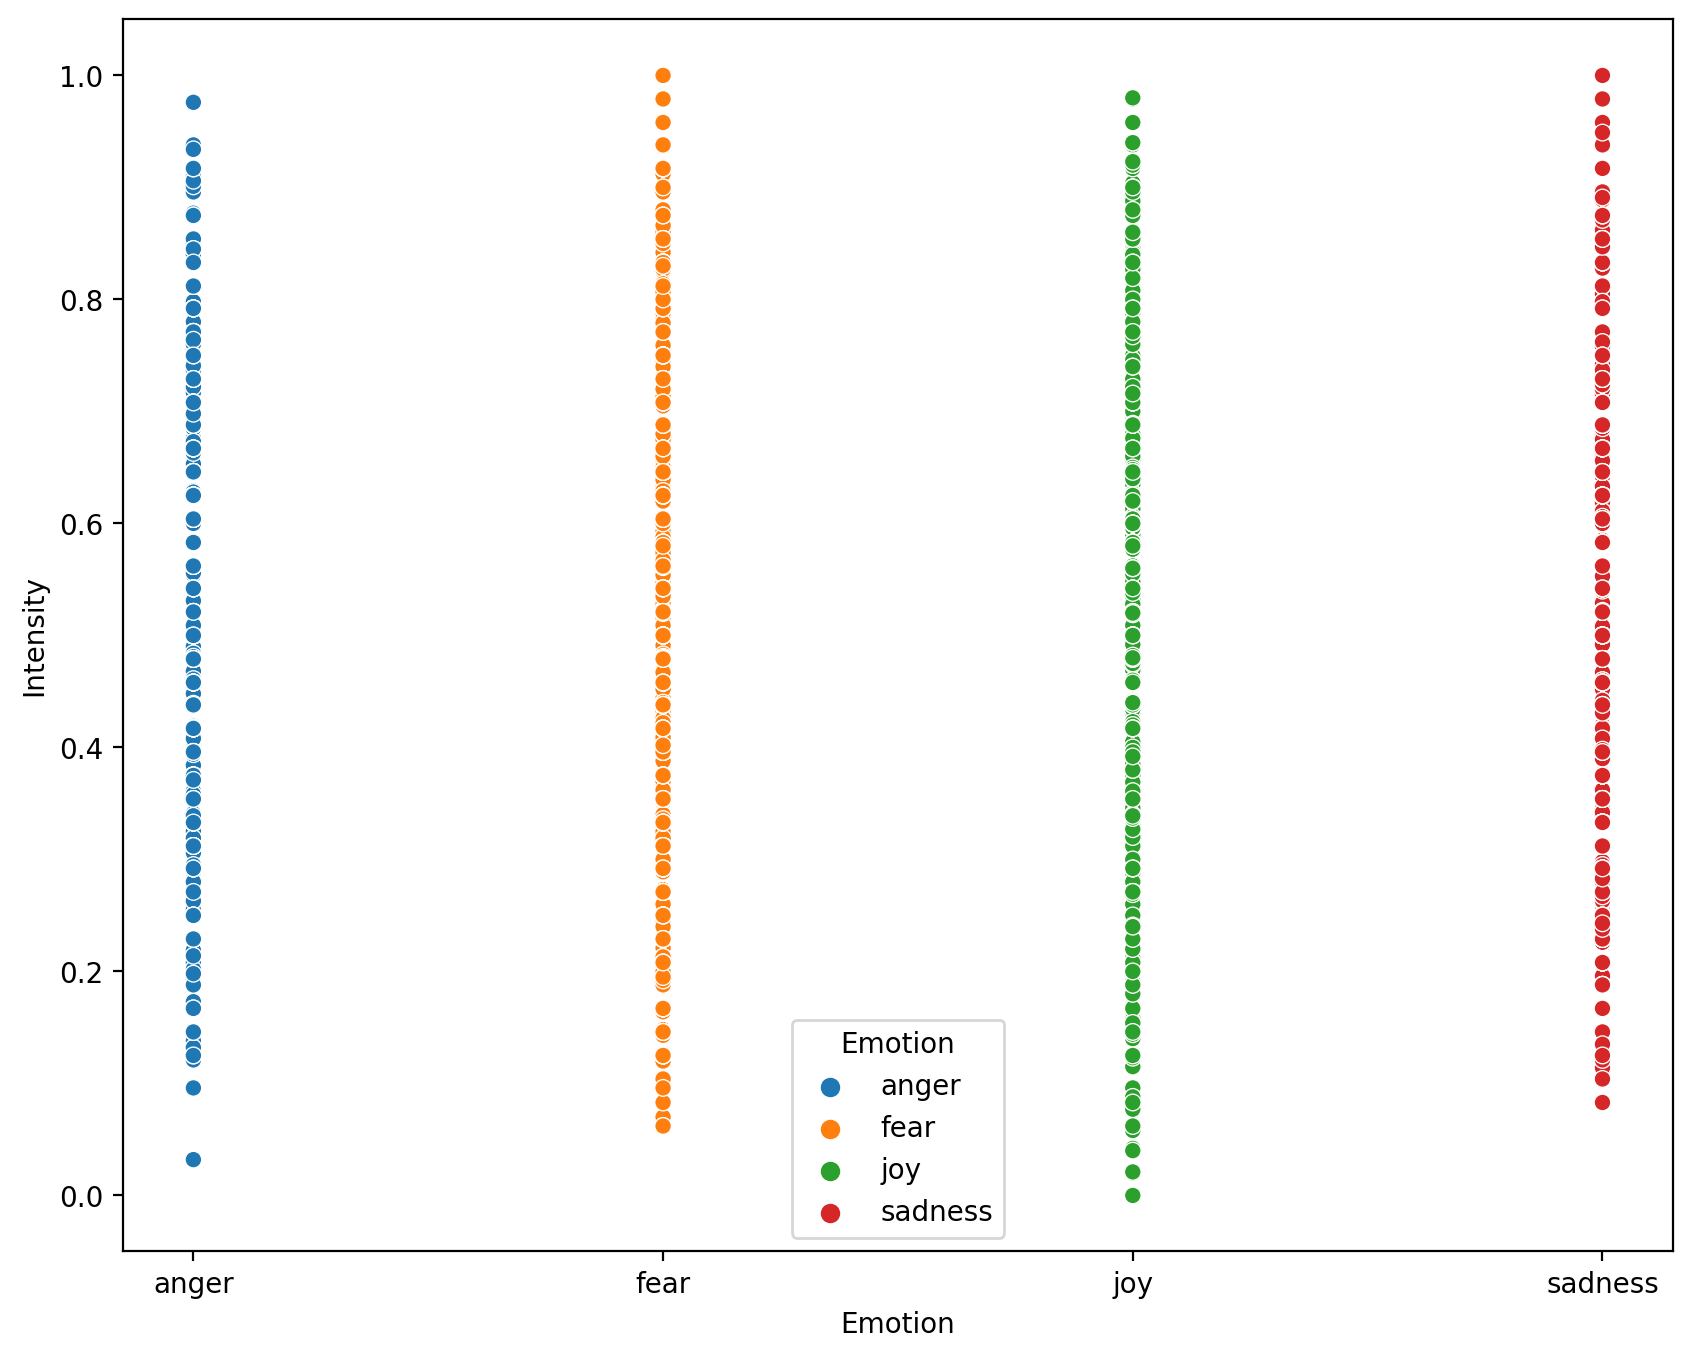

In [ ]:
plt.figure(figsize=(10,8),dpi=200)
sns.scatterplot(data=df, x='Emotion',y='Intensity',hue='Emotion')

<Figure size 2000x1600 with 0 Axes>

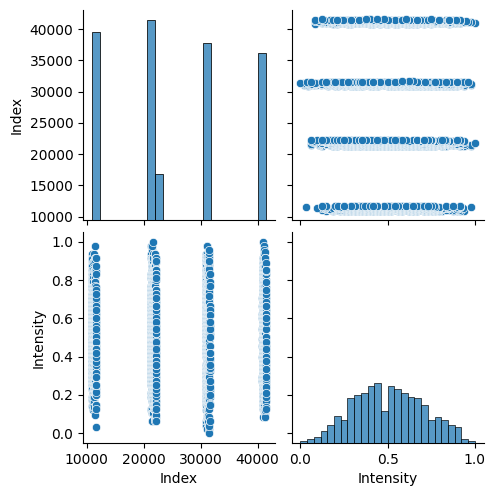

In [ ]:
plt.figure(figsize=(10,8),dpi=200)
sns.pairplot(data=df)

<Figure size 2000x1600 with 0 Axes>

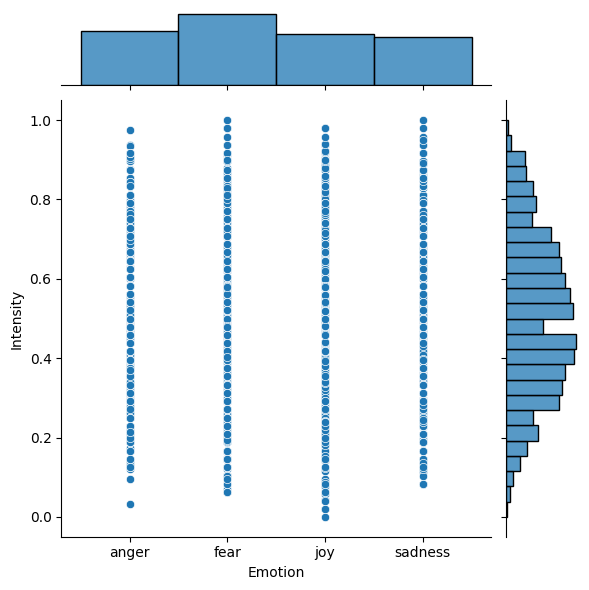

In [ ]:
plt.figure(figsize=(10,8),dpi=200)
sns.jointplot(data=df,x='Emotion',y='Intensity')

<Axes: xlabel='Intensity', ylabel='Count'>

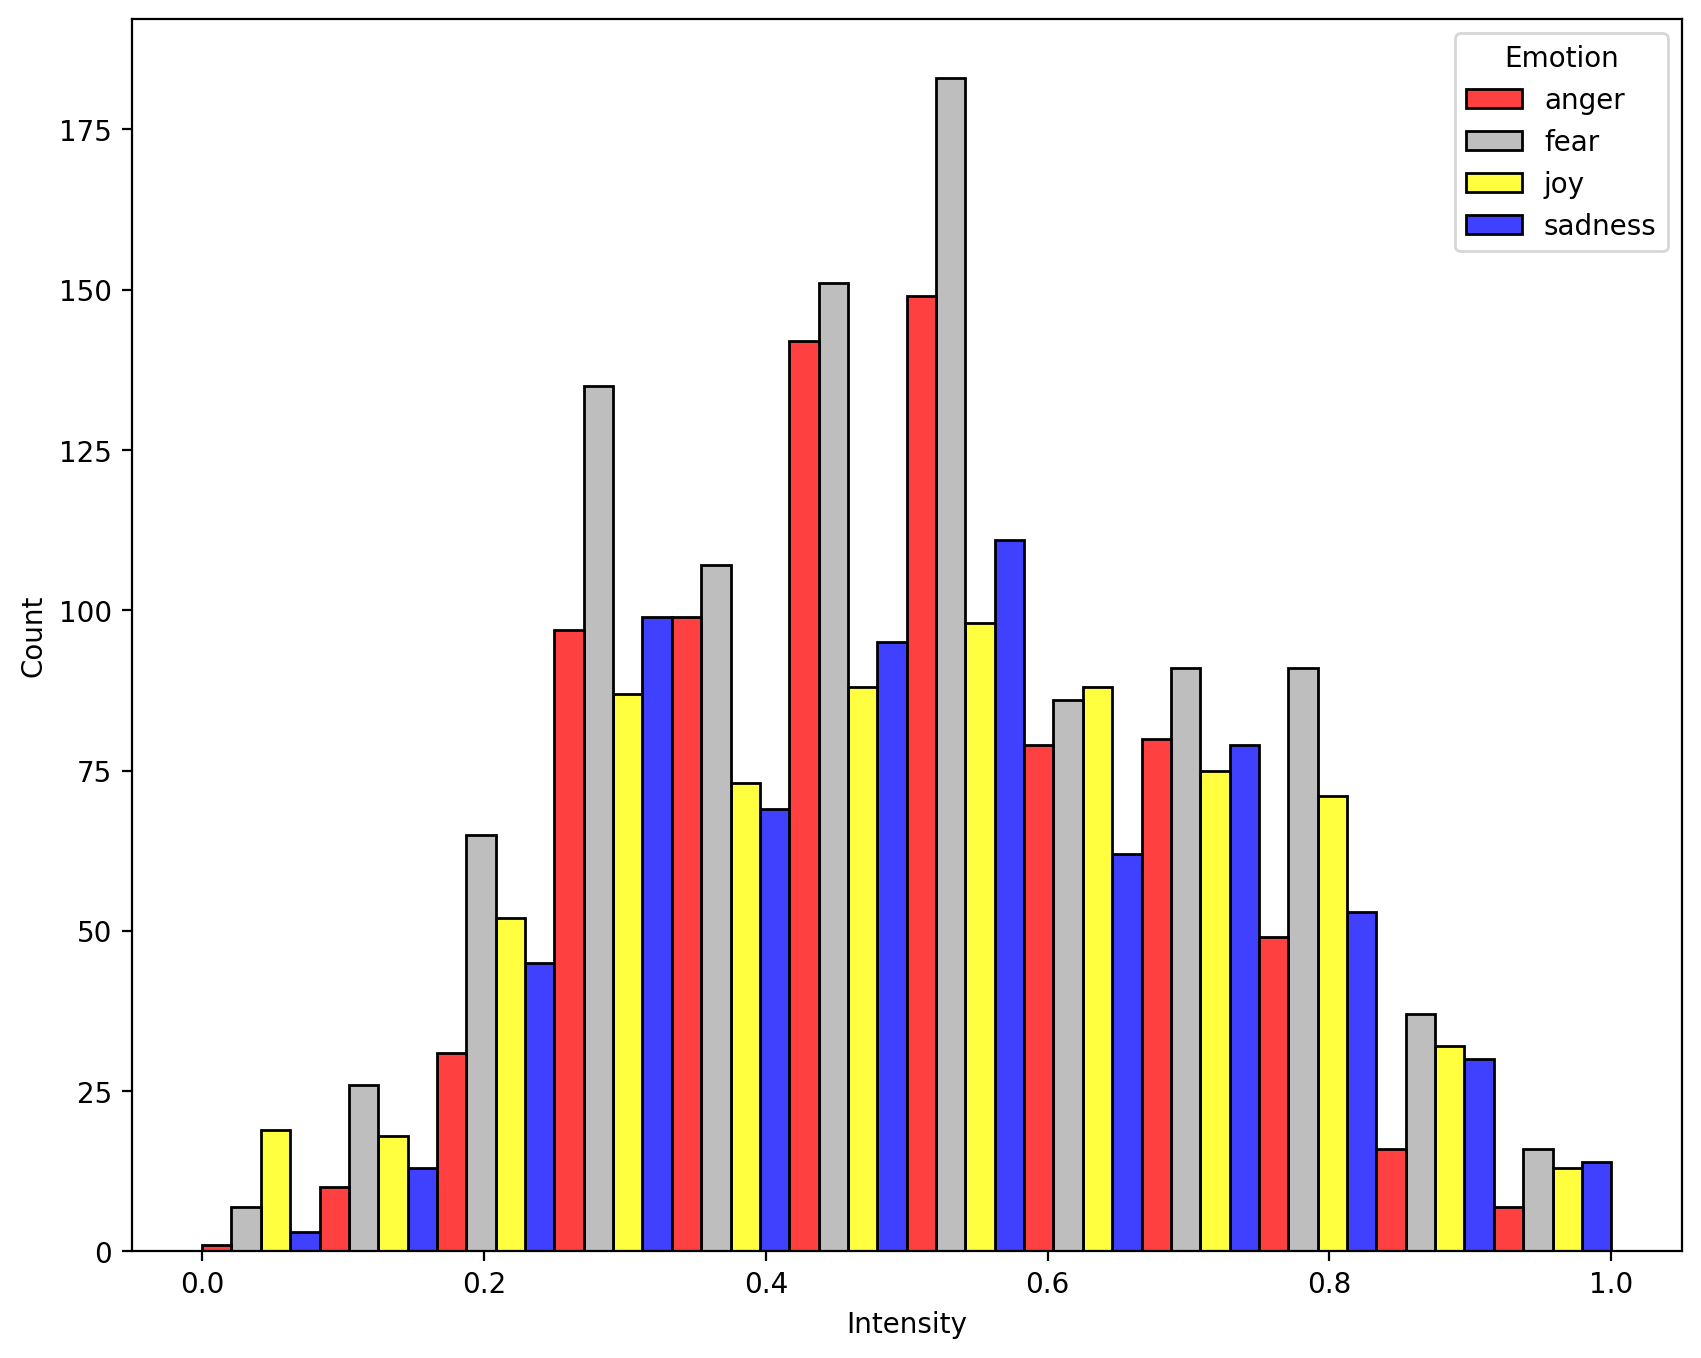

In [ ]:
plt.figure(figsize=(10,8),dpi=200)
sns.histplot(data=df,x='Intensity',hue='Emotion',element='bars',multiple='dodge',stat='count',bins=12,legend=True,palette=['red','#a9a9a9',"yellow","blue"])


In [ ]:
import pandas as pd

results_df = pd.DataFrame({'Metric':['Classifcation Loss','Regression Loss','Training F1','Test F1', 'Validation F1','Training R2', 'Test R2', 'Validation R2','Max Epoch','Optimzizer','Learning Rate','Patience','Batch Size']})
results_df

Metric
0   Classifcation Loss
1      Regression Loss
2          Training F1
3              Test F1
4        Validation F1
5          Training R2
6              Test R2
7        Validation R2
8            Max Epoch
9           Optimzizer
10       Learning Rate
11            Patience
12          Batch Size

# BERT Multi-task Modal with Classification + Regression


Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/loss.py:101: UserWarning: Using a target size (torch.Size([8])) that is different to the input size (torch.Size([8, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.l1_loss(input, target, reduction=self.reduction)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/loss.py:101: UserWarning: Using a target size (torch.Size([2])) that is different to the input size (torch.Size([2, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.l1_loss(input, target, reduction=self.reduction)


average_combined_val_loss:1.151433452963829
all_true_train_outputs:[tensor(0.1400), tensor(0.5580), tensor(0.5830), tensor(0.5620), tensor(0.7500), tensor(0.3600), tensor(0.4790), tensor(0.3540), tensor(0.5620), tensor(0.5620), tensor(0.7290), tensor(0.5830), tensor(0.4170), tensor(0.8330), tensor(0.3800), tensor(0.6550), tensor(0.3330), tensor(0.2310), tensor(0.4790), tensor(0.7920), tensor(0.3960), tensor(0.4000), tensor(0.4470), tensor(0.4790), tensor(0.6880), tensor(0.2120), tensor(0.8120), tensor(0.4620), tensor(0.6040), tensor(0.8540), tensor(0.3120), tensor(0.6000), tensor(0.3540), tensor(0.6250), tensor(0.5210), tensor(0.5830), tensor(0.3540), tensor(0.3430), tensor(0.3960), tensor(0.3600), tensor(0.6460), tensor(0.4790), tensor(0.5000), tensor(0.4380), tensor(0.2710), tensor(0.6250), tensor(0.5200), tensor(0.3960), tensor(0.3750), tensor(0.4380), tensor(0.2290), tensor(0.2710), tensor(0.3960), tensor(0.1880), tensor(0.4790), tensor(0.5100), tensor(0.6040), tensor(0.4170), tens

/usr/local/lib/python3.10/dist-packages/torch/nn/modules/loss.py:101: UserWarning: Using a target size (torch.Size([8])) that is different to the input size (torch.Size([8, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.l1_loss(input, target, reduction=self.reduction)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/loss.py:101: UserWarning: Using a target size (torch.Size([2])) that is different to the input size (torch.Size([2, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.l1_loss(input, target, reduction=self.reduction)


average_combined_val_loss:0.5439555644989014
all_true_train_outputs:[tensor(0.3750), tensor(0.2290), tensor(0.4200), tensor(0.5000), tensor(0.7200), tensor(0.8960), tensor(0.6460), tensor(0.4790), tensor(0.3540), tensor(0.6250), tensor(0.6020), tensor(0.5210), tensor(0.5620), tensor(0.2290), tensor(0.4200), tensor(0.5830), tensor(0.8000), tensor(0.8120), tensor(0.5600), tensor(0.4380), tensor(0.7500), tensor(0.5210), tensor(0.3580), tensor(0.7290), tensor(0.5830), tensor(0.2500), tensor(0.6250), tensor(0.3540), tensor(0.3750), tensor(0.4790), tensor(0.4790), tensor(0.5000), tensor(0.4790), tensor(0.4580), tensor(0.5000), tensor(0.3330), tensor(0.6880), tensor(0.3120), tensor(0.6400), tensor(0.2500), tensor(0.4790), tensor(0.4800), tensor(0.2800), tensor(0.3540), tensor(0.5830), tensor(0.5000), tensor(0.6250), tensor(0.9170), tensor(0.1250), tensor(0.1040), tensor(0.5620), tensor(0.5830), tensor(0.1540), tensor(0.3540), tensor(0.2710), tensor(0.4170), tensor(0.6670), tensor(0.5210), ten

/usr/local/lib/python3.10/dist-packages/torch/nn/modules/loss.py:101: UserWarning: Using a target size (torch.Size([8])) that is different to the input size (torch.Size([8, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.l1_loss(input, target, reduction=self.reduction)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/loss.py:101: UserWarning: Using a target size (torch.Size([2])) that is different to the input size (torch.Size([2, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.l1_loss(input, target, reduction=self.reduction)


average_combined_val_loss:0.14215609431266785
all_true_train_outputs:[tensor(0.7500), tensor(0.2710), tensor(0.3330), tensor(0.4790), tensor(0.4580), tensor(0.5830), tensor(0.6000), tensor(0.4170), tensor(0.5000), tensor(0.8120), tensor(0.7500), tensor(0.4580), tensor(0.2080), tensor(0.2500), tensor(0.7420), tensor(0.5620), tensor(0.4580), tensor(0.5830), tensor(0.2920), tensor(0.2500), tensor(0.7600), tensor(0.8120), tensor(0.6670), tensor(0.1920), tensor(0.6460), tensor(0.3470), tensor(0.7290), tensor(0.5830), tensor(0.5000), tensor(0.6880), tensor(0.5430), tensor(0.8150), tensor(0.4580), tensor(0.4170), tensor(0.8640), tensor(0.6300), tensor(0.5420), tensor(0.5000), tensor(0.5620), tensor(0.6040), tensor(0.3960), tensor(0.3850), tensor(0.3330), tensor(0.6670), tensor(0.5420), tensor(0.2500), tensor(0.6880), tensor(0.7290), tensor(0.5000), tensor(0.5830), tensor(0.3120), tensor(0.5210), tensor(0.5210), tensor(0.6670), tensor(0.8330), tensor(0.2710), tensor(0.4580), tensor(0.6240), te

/usr/local/lib/python3.10/dist-packages/torch/nn/modules/loss.py:101: UserWarning: Using a target size (torch.Size([8])) that is different to the input size (torch.Size([8, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.l1_loss(input, target, reduction=self.reduction)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/loss.py:101: UserWarning: Using a target size (torch.Size([2])) that is different to the input size (torch.Size([2, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.l1_loss(input, target, reduction=self.reduction)


average_combined_val_loss:0.09282669331878424
all_true_train_outputs:[tensor(0.2080), tensor(0.3750), tensor(0.5620), tensor(0.7080), tensor(0.8750), tensor(0.3750), tensor(0.5400), tensor(0.3750), tensor(0.3540), tensor(0.7400), tensor(0.5000), tensor(0.3980), tensor(0.6630), tensor(0.3960), tensor(0.4790), tensor(0.3330), tensor(0.3960), tensor(0.5000), tensor(0.5420), tensor(0.8650), tensor(0.5620), tensor(0.6880), tensor(0.3330), tensor(0.2500), tensor(0.3120), tensor(0.2290), tensor(0.2920), tensor(0.1880), tensor(0.7500), tensor(0.4580), tensor(0.3960), tensor(0.3330), tensor(0.7080), tensor(0.5830), tensor(0.5210), tensor(0.6460), tensor(0.5000), tensor(0.5000), tensor(0.5420), tensor(0.5830), tensor(0.3200), tensor(0.4380), tensor(0.3960), tensor(0.3330), tensor(0.4170), tensor(0.5830), tensor(0.6000), tensor(0.2200), tensor(0.5830), tensor(0.6020), tensor(0.5830), tensor(0.3150), tensor(0.4170), tensor(0.8120), tensor(0.4380), tensor(0.1200), tensor(0.3960), tensor(0.1460), te

/usr/local/lib/python3.10/dist-packages/torch/nn/modules/loss.py:101: UserWarning: Using a target size (torch.Size([8])) that is different to the input size (torch.Size([8, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.l1_loss(input, target, reduction=self.reduction)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/loss.py:101: UserWarning: Using a target size (torch.Size([2])) that is different to the input size (torch.Size([2, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.l1_loss(input, target, reduction=self.reduction)


average_combined_val_loss:0.3424198441207409
all_true_train_outputs:[tensor(0.3730), tensor(0.6670), tensor(0.5620), tensor(0.3750), tensor(0.5000), tensor(0.6040), tensor(0.1880), tensor(0.2710), tensor(0.8120), tensor(0.3750), tensor(0.4380), tensor(0.6040), tensor(0.5210), tensor(0.2500), tensor(0.3960), tensor(0.6460), tensor(0.6670), tensor(0.5620), tensor(0.6180), tensor(0.4790), tensor(0.9200), tensor(0.4800), tensor(0.3470), tensor(0.8960), tensor(0.5210), tensor(0.2290), tensor(0.2500), tensor(0.7080), tensor(0.5960), tensor(0.5210), tensor(0.1880), tensor(0.5000), tensor(0.5210), tensor(0.3330), tensor(0.5400), tensor(0.5420), tensor(0.4380), tensor(0.6040), tensor(0.6150), tensor(0.2290), tensor(0.5420), tensor(0.7710), tensor(0.6130), tensor(0.6040), tensor(0.3400), tensor(0.7290), tensor(0.6880), tensor(0.2920), tensor(0.8630), tensor(0.3750), tensor(0.5000), tensor(0.5340), tensor(0.9400), tensor(0.5210), tensor(0.6610), tensor(0.6880), tensor(0.3750), tensor(0.6600), ten

/usr/local/lib/python3.10/dist-packages/torch/nn/modules/loss.py:101: UserWarning: Using a target size (torch.Size([8])) that is different to the input size (torch.Size([8, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.l1_loss(input, target, reduction=self.reduction)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/loss.py:101: UserWarning: Using a target size (torch.Size([2])) that is different to the input size (torch.Size([2, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.l1_loss(input, target, reduction=self.reduction)


average_combined_val_loss:0.13546490296721458
all_true_train_outputs:[tensor(0.3390), tensor(0.5210), tensor(0.7290), tensor(0.6460), tensor(0.6880), tensor(0.3540), tensor(0.3620), tensor(0.4380), tensor(0.5420), tensor(0.9260), tensor(0.2710), tensor(0.4150), tensor(0.2750), tensor(0.1250), tensor(0.6000), tensor(0.2710), tensor(0.5200), tensor(0.2080), tensor(0.7500), tensor(0.6040), tensor(0.6250), tensor(0.5420), tensor(0.8700), tensor(0.3540), tensor(0.5420), tensor(0.4580), tensor(0.4520), tensor(0.6250), tensor(0.1080), tensor(0.5210), tensor(0.6460), tensor(0.6040), tensor(0.5420), tensor(0.3200), tensor(0.4380), tensor(0.4200), tensor(0.2350), tensor(0.5620), tensor(0.6040), tensor(0.1880), tensor(0.6880), tensor(0.2920), tensor(0.4600), tensor(0.5420), tensor(0.4170), tensor(0.6040), tensor(0.3120), tensor(0.3120), tensor(0.5420), tensor(0.4170), tensor(0.4790), tensor(0.8540), tensor(0.3540), tensor(0.1040), tensor(0.7710), tensor(0.6670), tensor(0.6320), tensor(0.3330), te

/usr/local/lib/python3.10/dist-packages/torch/nn/modules/loss.py:101: UserWarning: Using a target size (torch.Size([8])) that is different to the input size (torch.Size([8, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.l1_loss(input, target, reduction=self.reduction)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/loss.py:101: UserWarning: Using a target size (torch.Size([2])) that is different to the input size (torch.Size([2, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.l1_loss(input, target, reduction=self.reduction)


average_combined_val_loss:0.035056353313848376
all_true_train_outputs:[tensor(0.3960), tensor(0.5210), tensor(0.6600), tensor(0.7710), tensor(0.0960), tensor(0.6670), tensor(0.1250), tensor(0.5620), tensor(0.7500), tensor(0.2500), tensor(0.3120), tensor(0.2800), tensor(0.6400), tensor(0.3600), tensor(0.2080), tensor(0.5000), tensor(0.3040), tensor(0.6040), tensor(0.7080), tensor(0.4380), tensor(0.6670), tensor(0.5830), tensor(0.2710), tensor(0.7920), tensor(0.7290), tensor(0.3960), tensor(0.8850), tensor(0.5620), tensor(0.6040), tensor(0.6190), tensor(0.2710), tensor(0.3400), tensor(0.2500), tensor(0.7080), tensor(0.5210), tensor(0.8490), tensor(0.1000), tensor(0.4800), tensor(0.2290), tensor(0.5420), tensor(0.2500), tensor(0.7920), tensor(0.6880), tensor(0.7710), tensor(0.5210), tensor(0.3960), tensor(0.3750), tensor(0.9170), tensor(0.2290), tensor(0.4380), tensor(0.6670), tensor(0.3540), tensor(0.4580), tensor(0.7290), tensor(0.5210), tensor(0.5000), tensor(0.9380), tensor(0.5780), t

/usr/local/lib/python3.10/dist-packages/torch/nn/modules/loss.py:101: UserWarning: Using a target size (torch.Size([8])) that is different to the input size (torch.Size([8, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.l1_loss(input, target, reduction=self.reduction)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/loss.py:101: UserWarning: Using a target size (torch.Size([2])) that is different to the input size (torch.Size([2, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.l1_loss(input, target, reduction=self.reduction)


average_combined_val_loss:0.11933088838122785
all_true_train_outputs:[tensor(0.7080), tensor(0.3540), tensor(0.2790), tensor(0.2310), tensor(0.5650), tensor(0.3120), tensor(0.4790), tensor(0.7080), tensor(0.4550), tensor(0.4170), tensor(0.5210), tensor(0.1460), tensor(0.5420), tensor(0.3250), tensor(0.2920), tensor(0.8700), tensor(0.6880), tensor(0.7920), tensor(0.3960), tensor(0.6600), tensor(0.4380), tensor(0.1880), tensor(0.3600), tensor(0.3120), tensor(0.2500), tensor(0.3700), tensor(0.7600), tensor(0.5210), tensor(0.4170), tensor(0.2750), tensor(0.4790), tensor(0.6670), tensor(0.5540), tensor(0.4950), tensor(0.3960), tensor(0.3960), tensor(0.3200), tensor(0.3540), tensor(0.6040), tensor(0.3520), tensor(0.5000), tensor(0.3330), tensor(0.3540), tensor(0.3330), tensor(0.2710), tensor(0.4170), tensor(0.5000), tensor(0.2710), tensor(0.3730), tensor(0.5620), tensor(0.7080), tensor(0.3960), tensor(0.6670), tensor(0.5210), tensor(0.4580), tensor(0.3330), tensor(0.4620), tensor(0.5210), te

/usr/local/lib/python3.10/dist-packages/torch/nn/modules/loss.py:101: UserWarning: Using a target size (torch.Size([8])) that is different to the input size (torch.Size([8, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.l1_loss(input, target, reduction=self.reduction)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/loss.py:101: UserWarning: Using a target size (torch.Size([2])) that is different to the input size (torch.Size([2, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.l1_loss(input, target, reduction=self.reduction)


average_combined_val_loss:0.1039765477180481
all_true_train_outputs:[tensor(0.1880), tensor(0.3330), tensor(0.3890), tensor(0.5210), tensor(0.3330), tensor(0.4380), tensor(0.6150), tensor(0.4790), tensor(0.4580), tensor(0.4170), tensor(0.2290), tensor(0.8750), tensor(0.5420), tensor(0.8680), tensor(0.4400), tensor(0.7500), tensor(0.3330), tensor(0.6460), tensor(0.3540), tensor(0.2710), tensor(0.6670), tensor(0.3120), tensor(0.3560), tensor(0.7080), tensor(0.2400), tensor(0.5420), tensor(0.7920), tensor(0.2920), tensor(0.6670), tensor(0.6040), tensor(0.1890), tensor(0.2920), tensor(0.6460), tensor(0.4580), tensor(0.4400), tensor(0.5620), tensor(0.1000), tensor(0.2710), tensor(0.4170), tensor(0.4790), tensor(0.4170), tensor(0.2500), tensor(0.5210), tensor(0.4790), tensor(0.2290), tensor(0.1730), tensor(0.3750), tensor(0.1920), tensor(0.8750), tensor(0.3200), tensor(0.3030), tensor(0.7500), tensor(0.4580), tensor(0.4170), tensor(0.6670), tensor(0.4380), tensor(0.7710), tensor(0.3400), ten

/usr/local/lib/python3.10/dist-packages/torch/nn/modules/loss.py:101: UserWarning: Using a target size (torch.Size([8])) that is different to the input size (torch.Size([8, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.l1_loss(input, target, reduction=self.reduction)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/loss.py:101: UserWarning: Using a target size (torch.Size([2])) that is different to the input size (torch.Size([2, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.l1_loss(input, target, reduction=self.reduction)


average_combined_val_loss:0.18400483368895948
Early stopping triggered after 10 epochs without improvement.


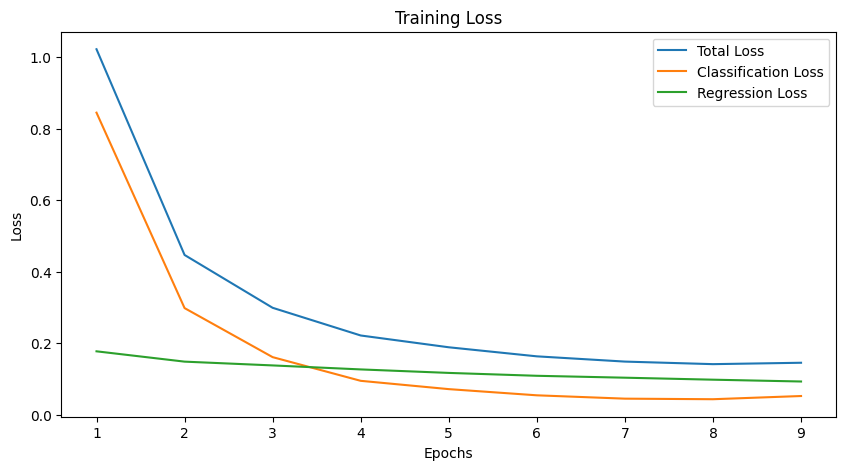

Pearson correlation in evaluate : 0.62348586870228
P-value Training: 1.1697449057128448e-38
reg mse: 0.022907186299562454


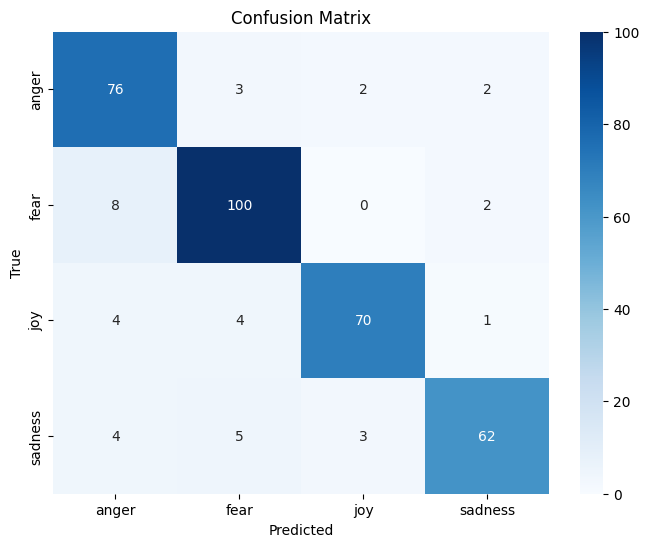

Validation Classification Loss: 0.465, Validation Regression Loss: 0.117
Validation Classification Accuracy: 0.890
Validation Regression Accuracy: 0.334
Validation Correlation Coefficient: 0.623
Pearson correlation in evaluate : 0.7046818650282544
P-value Training: 0.0
reg mse: 0.020561009645462036


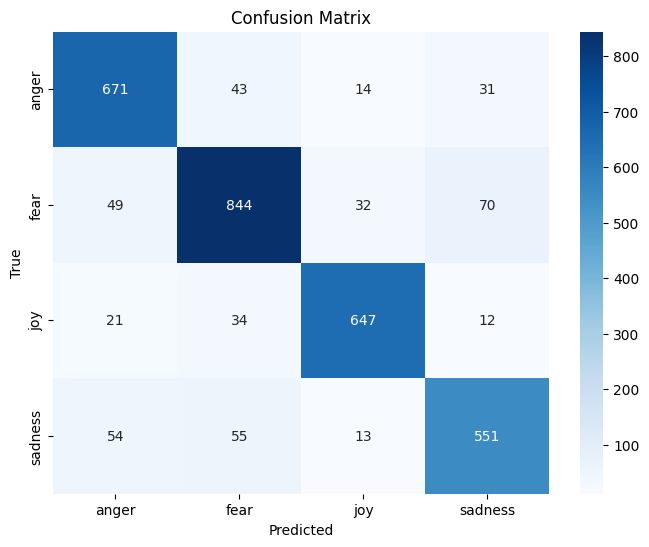

Test Classification Loss: 0.556, Test Regression Loss: 0.112
Test Regression Accuracy: 0.479
Test Classification Accuracy: 0.864
Test Correlation Coefficient: 0.705
predicted_emotion_labels:tensor([2], device='cuda:0')
predicted_intensity_values:[[0.9306065]]
predicted_emotion_labels:tensor([1], device='cuda:0')
predicted_intensity_values:[[0.6848592]]


Metric Roberta_MultiTask Roberta_Classification  \
0   Classifcation Loss          0.045726               0.112553   
1      Regression Loss           0.10409                    N/A   
2          Training F1           0.98336               0.954597   
3              Test F1          0.852454               0.855755   
4        Validation F1          0.849553               0.864372   
5          Training R2          0.426939                    N/A   
6              Test R2          0.317384                    N/A   
7        Validation R2          0.212449                    N/A   
8            Max Epoch                17                      5   
9           Optimzizer             AdamW                  AdamW   
10       Learning Rate           0.00002                0.00005   
11            Patience                 3                      3   
12          Batch Size               128                     32   

   Bert_Classification BERT Regression Fear BERT Regression Anger  \
0             0.107759                  N/A                   N/A   
1                  N/A             0.054766              0.032271   
2             0.938609                  N/A                   N/A   
3              0.85518                  N/A                   N/A   
4             0.862154                  N/A                   N/A   
5                  N/A             0.881687              0.951571   
6                  N/A             0.535351               0.53406   
7                  N/A              0.33734               0.39829   
8                    3                   30                    47   
9                AdamW                AdamW                 AdamW   
10             0.00005             0.000005               0.00005   
11                   3                    5                     5   
12                  64                   64                    64   

   BERT Regression Joy BERT Regression Sadness T5 Small Classification  \
0                  N/A                     N/A                0.163887   
1             0.060322                0.068305                     N/A   
2                  N/A                     N/A                0.997361   
3                  N/A                     N/A                0.773957   
4                  N/A                     N/A                     N/A   
5             0.869842                0.748579                     N/A   
6             0.626282                 0.62225                     N/A   
7              0.63768                0.316065                     N/A   
8                   21                      16               17.699115   
9                AdamW                   AdamW                     N/A   
10             0.00005                 0.00005                     N/A   
11                   5                       5                       3   
12                  64                      64                      32   

   Distil_BERT_Classification Distil_BERT_MultiTaskModal BERT Multi-task  
0                    0.044538                   0.038899        0.038834  
1                         N/A                   0.089756        0.085526  
2                    0.982003                   0.980337         0.97703  
3                    0.850866                   0.857259         0.86372  
4                    0.864213                   0.875566        0.890424  
5                         N/A                    0.60792        0.615432  
6                         N/A                   0.396555        0.478584  
7                         N/A                   0.293827        0.333764  
8                           7                          9               9  
9                       AdamW                      AdamW           AdamW  
10                    0.00005                    0.00002         0.00002  
11                          6                          3               3  
12                         64                          8               8

In [ ]:
import torch
from torch.utils.data import DataLoader, TensorDataset
from transformers import BertTokenizer, BertForSequenceClassification, AdamW,RobertaTokenizer,RobertaForSequenceClassification
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, mean_squared_error as mse,r2_score,f1_score,confusion_matrix
from torch.optim import RMSprop,SGD,Adagrad
import torch.nn as nn
from torcheval.metrics import R2Score
from tidyX import TextPreprocessor as tp
from scipy.stats import pearsonr
import matplotlib.pyplot as plt



# Load pre-trained BERT tokenizer and model
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
pretrained_model = BertForSequenceClassification.from_pretrained('bert-base-uncased')

class RegressionHead(torch.nn.Module):
    def __init__(self, hidden_size):
        super(RegressionHead, self).__init__()
        self.regression = torch.nn.Linear(hidden_size,1)

    def forward(self, x):
        x = self.regression(x)
        return x

# Define the Multi-Task Emotion Model
class MultiTaskEmotionModel(torch.nn.Module):
    def __init__(self, bert_model, num_classes):
        super(MultiTaskEmotionModel, self).__init__()
        self.bert = bert_model
        self.classification_head = torch.nn.Linear(self.bert.config.hidden_size, num_classes)
        self.regression_head = RegressionHead(self.bert.config.hidden_size)




    def forward(self, input_ids, attention_mask=None):

        outputs = self.bert(input_ids=input_ids, attention_mask=attention_mask,output_hidden_states=True)

        pooled_output = outputs.hidden_states[-1][:, 0, :]

        # For classification task
        classification_logits = self.classification_head(pooled_output)


        # For regression task
        regression_output = self.regression_head(pooled_output)


        return classification_logits, regression_output

labels_classification_encoded= []

# Function to load and preprocess the data
def load_data(file_path, tokenizer):
    texts = []
    labels_classification = []
    labels_regression = []


    with open(file_path, encoding='utf-8') as f:
        next(f)  # Skip the header line
        for line in f:
            parts = line.strip().split("\t")
            if len(parts) >= 4:
              text, emotion, intensity =  parts[1], parts[2], float(parts[3])
              #Preprocess Text
              # if intensity > 0.05  and intensity < 0.95:
              #   preprocessed_text = tp.preprocess(text,delete_emojis=False)
              texts.append(text)
              labels_classification.append(emotion)
              labels_regression.append(intensity)


    inputs = tokenizer(texts, padding=True, truncation=True, return_tensors='pt')

    # Use label encoding for emotion labels
    emotion_label_encoder = LabelEncoder()
    labels_classification_encoded = emotion_label_encoder.fit_transform(labels_classification)

    labels_classification = torch.tensor(labels_classification_encoded)
    labels_regression = torch.tensor(labels_regression,dtype=torch.float)


    return TensorDataset(inputs.input_ids, inputs.attention_mask, labels_classification, labels_regression)

# # Load the data
train_dataset = load_data('home/train.txt', tokenizer)
valid_dataset = load_data('home/dev.txt', tokenizer)
test_dataset = load_data('home/test.txt', tokenizer)

# Create DataLoader objects
BATCH_SIZE = 8
train_loader = DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True)
valid_loader = DataLoader(valid_dataset, batch_size=BATCH_SIZE,shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=BATCH_SIZE,shuffle=True)

# Set up the device
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Initialize the multi-task model
NUM_CLASSES = 4  # Number of emotion categories (anger, fear, joy, sadness)
multi_task_model = MultiTaskEmotionModel(pretrained_model, num_classes=NUM_CLASSES)
multi_task_model.to(device)

LEARNING_RATE = 2e-5
OPTIMIZER = 'AdamW'

# Set up the optimizer and loss functions
optimizer = torch.optim.AdamW(multi_task_model.parameters(), lr=LEARNING_RATE)
classification_criterion = torch.nn.CrossEntropyLoss()
regression_criterion = nn.L1Loss()

# Train the multi-task model
NUM_EPOCHS = 30

# Early stopping parameters
early_stopping_patience = 3  # Number of epochs to wait for improvement
best_combined_loss = float('inf')  # Initialize the best validation loss
no_improvement_count = 0  # Initialize the count for the number of epochs with no improvement

# List storing training loss for each epoch
list_total_train_loss = []
list_train_regression_loss = []
list_train_classification_loss = []

for epoch in range(NUM_EPOCHS):
    multi_task_model.train()

    # Default variables
    total_classification_loss = 0.0
    total_regression_loss = 0.0
    total_val_classification_loss = 0.0
    total_val_regression_loss = 0.0
    combined_val_total_loss =0.0
    all_predicted_train_labels = []
    all_true_train_labels = []
    all_predicted_train_outputs = []
    all_true_train_outputs = []



    for batch in train_loader:
        batch_input_ids, batch_attention_mask, batch_labels_classification, batch_labels_regression = batch
        batch_input_ids, batch_attention_mask, batch_labels_classification, batch_labels_regression = \
            batch_input_ids.to(device), batch_attention_mask.to(device), batch_labels_classification.to(device), batch_labels_regression.to(device)

        optimizer.zero_grad()
        classification_logits, regression_output = multi_task_model(batch_input_ids, attention_mask=batch_attention_mask)

        # Compute losses for classification and regression tasks
        classification_loss = classification_criterion(classification_logits, batch_labels_classification)


        # regression_loss
        regression_loss = regression_criterion(regression_output.squeeze(), batch_labels_regression)


        # Total loss is a combined sum of classification and regression loss
        total_loss = classification_loss + regression_loss


        total_loss.backward()
        optimizer.step()

        ## The loss is aggregated for each iteration representing a batch to come with the combined loss of whole epoch for classification and regression
        total_classification_loss += classification_loss.item()
        total_regression_loss += regression_loss.item()


        ## Classification Accuracy variables
        predicted_labels = classification_logits.argmax(dim=1)
        all_predicted_train_labels.extend(predicted_labels.cpu().numpy())
        all_true_train_labels.extend(batch_labels_classification.cpu().numpy())


        # Regression Training Accuracy outputs
        predicted_outputs = regression_output.cpu().detach().numpy()
        true_outputs = batch_labels_regression.cpu()

        all_predicted_train_outputs.extend(predicted_outputs.flatten())
        all_true_train_outputs.extend(true_outputs)




    ## Validation

    for batch in valid_loader:
        multi_task_model.eval()
        batch_input_ids, batch_attention_mask, batch_labels_classification, batch_labels_regression = batch
        batch_input_ids, batch_attention_mask, batch_labels_classification, batch_labels_regression = \
            batch_input_ids.to(device), batch_attention_mask.to(device), batch_labels_classification.to(device), batch_labels_regression.to(device)

        optimizer.zero_grad()
        classification_logits, regression_output = multi_task_model(batch_input_ids, attention_mask=batch_attention_mask)

        # Compute losses for classification and regression tasks
        classification_val_loss = classification_criterion(classification_logits, batch_labels_classification)


        regression_val_loss = regression_criterion(regression_output, batch_labels_regression)


        # Total loss is a weighted combination of classification and regression losses
        combined_val_loss = classification_val_loss + regression_val_loss

        total_val_classification_loss += classification_loss.item()
        total_val_regression_loss += regression_loss.item()
        combined_val_total_loss = total_val_classification_loss + total_val_regression_loss





    average_combined_val_loss = combined_val_total_loss/len(valid_loader)
    print(f'average_combined_val_loss:{average_combined_val_loss}')
    # Check for early stopping
    if average_combined_val_loss < best_combined_loss:
        best_combined_loss = average_combined_val_loss
        no_improvement_count = 0
    else:
        no_improvement_count += 1

    # If there's no improvement for the specified patience, stop training
    if no_improvement_count >= early_stopping_patience:
        print(f'Early stopping triggered after {epoch + 1} epochs without improvement.')
        break



    ## Training Metrics
    classification_train_accuracy = f1_score(all_true_train_labels, all_predicted_train_labels,average='weighted')

    ## Calculate Regression Accuracy using R2
    regression_train_accuracy = r2_score(all_true_train_outputs,all_predicted_train_outputs)

    print(f'all_true_train_outputs:{all_true_train_outputs}')
    print(f'all_predicted_train_outputs:{all_predicted_train_outputs}')



    print(f'Epoch {epoch + 1}/{NUM_EPOCHS}, '
          f'Classification Loss: {total_classification_loss / len(train_loader):.3f}, '
          f'Regression Loss: {total_regression_loss / len(train_loader):.3f}')

    print(f'Clasification Training F1 Score: {classification_train_accuracy}')
    print(f'Regression Training R2 Score {regression_train_accuracy}')

    class_loss = total_classification_loss / len(train_loader)
    reg_loss = total_regression_loss / len(train_loader)

    ##Total Regression Loss are added for each epoch
    list_train_regression_loss.append(reg_loss)

    ##Total Classification Loss is added for each epoch
    list_train_classification_loss.append(class_loss)

    ## Combined Training loss
    list_total_train_loss.append(reg_loss + class_loss)

    print(f'list_train_regression_loss:{list_train_regression_loss}')

# Plotting loss with epochs
plt.figure(figsize=(10, 5))
plt.plot(range(1, epoch + 1), list_total_train_loss, label='Total Loss')
plt.plot(range(1, epoch + 1), list_train_classification_loss, label='Classification Loss')
plt.plot(range(1, epoch + 1), list_train_regression_loss, label='Regression Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training Loss')
plt.legend()
plt.show()

# Function for evaluation
def evaluate_model(model, data_loader, classification_criterion, regression_criterion):
    model.eval()
    total_classification_loss = 0.0
    total_regression_loss = 0.0
    all_predicted_labels = []
    all_true_labels = []
    all_predicted_outputs = []
    all_true_outputs = []

    with torch.no_grad():
      for batch in data_loader:
          batch_input_ids, batch_attention_mask, batch_labels_classification, batch_labels_regression = batch
          batch_input_ids, batch_attention_mask, batch_labels_classification, batch_labels_regression = \
              batch_input_ids.to(device), batch_attention_mask.to(device), batch_labels_classification.to(device), batch_labels_regression.to(device)


          # classification_logits, regression_output = model(input_ids, attention_mask=attention_mask)
          classification_logits, regression_output = model(batch_input_ids, attention_mask=batch_attention_mask)

          ## Classification Accuracy
          predicted_labels = classification_logits.argmax(dim=1)

          all_predicted_labels.extend(predicted_labels.cpu().numpy())
          all_true_labels.extend(batch_labels_classification.cpu().numpy())

          ## Regression Accuracy Variables
          ## Round predicted output to 3 decimals as per the input
          predicted_outputs = np.round(regression_output.flatten().cpu(),decimals=3)
          true_outputs = batch_labels_regression.cpu()

          # all_predicted_outputs.extend(predicted_outputs)
          all_predicted_outputs.extend(predicted_outputs.flatten())

          all_true_outputs.extend(true_outputs)



          classification_loss = classification_criterion(classification_logits, batch_labels_classification)
          regression_loss = regression_criterion(regression_output.squeeze(),batch_labels_regression)



          total_classification_loss += classification_loss.item()
          total_regression_loss += regression_loss.item()

    #Classification Accuracy
    classification_accuracy = f1_score(all_true_labels, all_predicted_labels,average='weighted')

    ## Regression Accuracy
    regression_r2_score = r2_score(all_true_outputs, all_predicted_outputs)

    ##Pearson correlation
    correlation_coefficient, p_value = pearsonr(all_predicted_outputs, all_true_outputs)
    print(f"Pearson correlation in evaluate : {correlation_coefficient}")
    print(f"P-value Training: {p_value}")

    ## Calculate Mean Squared Error
    reg_mse = mse(all_true_outputs,all_predicted_outputs)

    print(f'reg mse: {reg_mse}')



    avg_classification_loss = total_classification_loss / len(data_loader)
    avg_regression_loss = total_regression_loss / len(data_loader)

    ## Visualizations
    # Compute confusion matrix
    conf_matrix = confusion_matrix(all_true_labels, all_predicted_labels)

    # Visualize confusion matrix using seaborn heatmap
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['anger', 'fear', 'joy', 'sadness'],
                yticklabels=['anger', 'fear', 'joy', 'sadness'])
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title('Confusion Matrix')
    plt.show()

    return avg_classification_loss, avg_regression_loss, classification_accuracy,regression_r2_score, correlation_coefficient

# # Evaluate the model on the validation set
valid_classification_loss, valid_regression_loss, valid_classification_accuracy, valid_regression_accuracy,valid_correlation_coefficient = evaluate_model(multi_task_model, valid_loader,
                                                                   classification_criterion, regression_criterion)
print(f'Validation Classification Loss: {valid_classification_loss:.3f}, '
      f'Validation Regression Loss: {valid_regression_loss:.3f}')
print(f'Validation Classification Accuracy: {valid_classification_accuracy:.3f}')
print(f'Validation Regression Accuracy: {valid_regression_accuracy:.3f}')
print(f'Validation Correlation Coefficient: {valid_correlation_coefficient:.3f}')




# Evaluate the model on the test set
test_classification_loss, test_regression_loss,test_classification_accuracy,test_regression_accuracy,test_correlation_coefficient = evaluate_model(multi_task_model, test_loader,
                                                                 classification_criterion, regression_criterion)



print(f'Test Classification Loss: {test_classification_loss:.3f}, '
      f'Test Regression Loss: {test_regression_loss:.3f}')
print(f'Test Regression Accuracy: {test_regression_accuracy:.3f}')
print(f'Test Classification Accuracy: {test_classification_accuracy:.3f}')
print(f'Test Correlation Coefficient: {test_correlation_coefficient:.3f}')



# Use the trained model to predict custom input
tokenized_custom = tokenizer('What a wonderful and amazing day today', padding=True, truncation=True, return_tensors='pt')
custom_input_ids = tokenized_custom['input_ids']
custom_attention_mask = tokenized_custom['attention_mask']

tokenized_custom1 = tokenizer('I was shocked to hear the news about the war', padding=True, truncation=True, return_tensors='pt')
custom_input_ids1 = tokenized_custom1['input_ids']
custom_attention_mask1 = tokenized_custom1['attention_mask']



custom_input_ids = custom_input_ids.to(device)
custom_attention_mask = custom_attention_mask.to(device)

custom_input_ids1 = custom_input_ids1.to(device)
custom_attention_mask1 = custom_attention_mask1.to(device)

# Forward pass
with torch.no_grad():
    classification_logits, regression_output = multi_task_model(custom_input_ids, attention_mask=custom_attention_mask)
    classification_logits1, regression_output1 = multi_task_model(custom_input_ids1, attention_mask=custom_attention_mask1)



# Decode the classification output (if needed)
predicted_emotion_labels =  classification_logits.argmax(dim=1)


# Get the regression output
predicted_intensity_values = regression_output.cpu().numpy()


print(f"predicted_emotion_labels:{predicted_emotion_labels}")
print(f"predicted_intensity_values:{predicted_intensity_values}")

# Decode the classification output (if needed)
predicted_emotion_labels1 =  classification_logits1.argmax(dim=1)


# Get the regression output
predicted_intensity_values1 = regression_output1.cpu().numpy()


print(f"predicted_emotion_labels:{predicted_emotion_labels1}")
print(f"predicted_intensity_values:{predicted_intensity_values1}")

results_df['BERT Multi-task'] = [total_classification_loss / len(train_loader),total_regression_loss / len(train_loader),classification_train_accuracy,test_classification_accuracy,valid_classification_accuracy,regression_train_accuracy,test_regression_accuracy,valid_regression_accuracy,epoch,OPTIMIZER,LEARNING_RATE,early_stopping_patience, BATCH_SIZE]
results_df




# Roberta Multi-task (Emotion classification and Intensity detection)

Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at roberta-base and are newly initialized: ['classifier.out_proj.bias', 'classifier.out_proj.weight', 'classifier.dense.weight', 'classifier.dense.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/usr/local/lib/python3.10/dist-packages/transformers/optimization.py:429: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


average_combined_val_loss:0.7510946393013
Epoch 1/30, Classification Loss: 0.934, Regression Loss: 0.180
Clasification Training F1 Score: 0.5811695507490952
average_combined_val_loss:0.5338057205080986
Epoch 2/30, Classification Loss: 0.379, Regression Loss: 0.165
Clasification Training F1 Score: 0.859224556703456
average_combined_val_loss:0.5846372544765472
Epoch 3/30, Classification Loss: 0.240, Regression Loss: 0.146
Clasification Training F1 Score: 0.9164530053955517
average_combined_val_loss:0.1776379644870758
Epoch 4/30, Classification Loss: 0.166, Regression Loss: 0.140
Clasification Training F1 Score: 0.9404681428220903
average_combined_val_loss:0.16607569623738527
Epoch 5/30, Classification Loss: 0.131, Regression Loss: 0.137
Clasification Training F1 Score: 0.9548818408055444
average_combined_val_loss:0.11393083492293954
Epoch 6/30, Classification Loss: 0.100, Regression Loss: 0.131
Clasification Training F1 Score: 0.9623634834721077
average_combined_val_loss:0.25301691703498

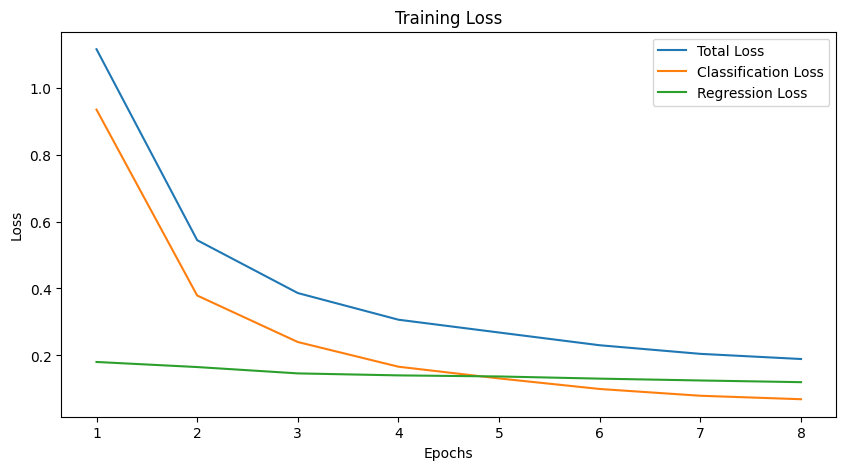

Pearson correlation in evaluate : 0.5673765680302364
P-value Training: 7.2046265764800315e-31


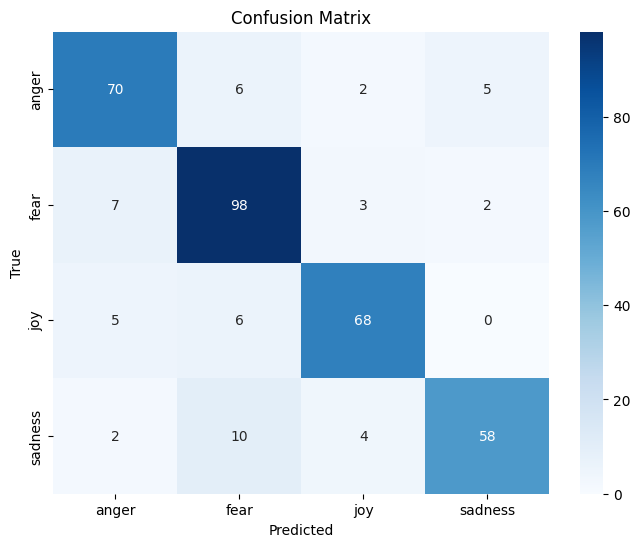

Validation Classification Loss: 0.547, Validation Regression Loss: 0.144
Validation Classification Accuracy: 0.850
Validation Regression Accuracy: 0.030
Valid Pearson correlation: 0.567
Pearson correlation in evaluate : 0.6655400805393644
P-value Training: 0.0


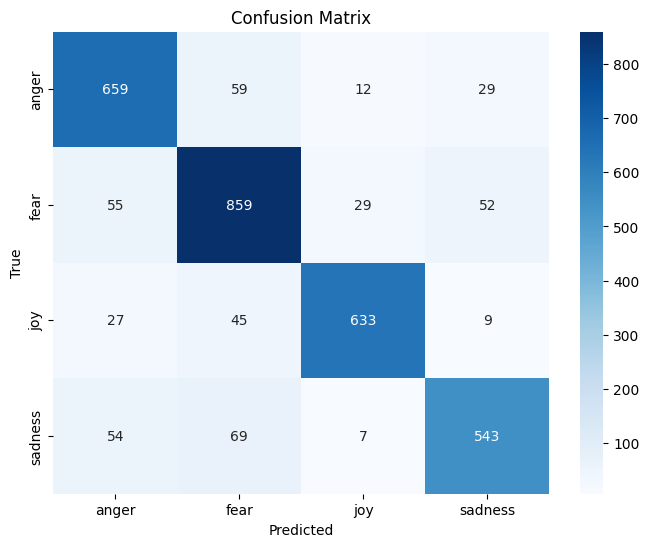

Test Classification Loss: 0.531, Test Regression Loss: 0.142
Test Regression Accuracy: 0.199
Test Classification Accuracy: 0.858
Test Pearson correlation: 0.666


Metric Roberta_MultiTask Roberta_Classification  \
0   Classifcation Loss          0.075269               0.112553   
1      Regression Loss          0.116711                    N/A   
2          Training F1          0.971492               0.954597   
3              Test F1          0.857898               0.855755   
4        Validation F1          0.849558               0.864372   
5          Training R2          0.359434                    N/A   
6              Test R2          0.199161                    N/A   
7        Validation R2          0.029643                    N/A   
8            Max Epoch                 8                      5   
9           Optimzizer             AdamW                  AdamW   
10       Learning Rate           0.00002                0.00005   
11            Patience                 3                      3   
12          Batch Size                 8                     32   

   Bert_Classification BERT Regression Fear BERT Regression Anger  \
0             0.107759                  N/A                   N/A   
1                  N/A             0.054766              0.032271   
2             0.938609                  N/A                   N/A   
3              0.85518                  N/A                   N/A   
4             0.862154                  N/A                   N/A   
5                  N/A             0.881687              0.951571   
6                  N/A             0.535351               0.53406   
7                  N/A              0.33734               0.39829   
8                    3                   30                    47   
9                AdamW                AdamW                 AdamW   
10             0.00005             0.000005               0.00005   
11                   3                    5                     5   
12                  64                   64                    64   

   BERT Regression Joy BERT Regression Sadness T5 Small Classification  \
0                  N/A                     N/A                0.163887   
1             0.060322                0.068305                     N/A   
2                  N/A                     N/A                0.997361   
3                  N/A                     N/A                0.773957   
4                  N/A                     N/A                     N/A   
5             0.869842                0.748579                     N/A   
6             0.626282                 0.62225                     N/A   
7              0.63768                0.316065                     N/A   
8                   21                      16               17.699115   
9                AdamW                   AdamW                     N/A   
10             0.00005                 0.00005                     N/A   
11                   5                       5                       3   
12                  64                      64                      32   

   Distil_BERT_Classification Distil_BERT_MultiTaskModal BERT Multi-task  
0                    0.044538                   0.038899        0.038834  
1                         N/A                   0.089756        0.085526  
2                    0.982003                   0.980337         0.97703  
3                    0.850866                   0.857259         0.86372  
4                    0.864213                   0.875566        0.890424  
5                         N/A                    0.60792        0.615432  
6                         N/A                   0.396555        0.478584  
7                         N/A                   0.293827        0.333764  
8                           7                          9               9  
9                       AdamW                      AdamW           AdamW  
10                    0.00005                    0.00002         0.00002  
11                          6                          3               3  
12                         64                          8               8

In [ ]:
## Roberta Multi-task Modal

import torch
from torch.utils.data import DataLoader, TensorDataset
from transformers import BertTokenizer, BertForSequenceClassification, AdamW,RobertaTokenizer,RobertaForSequenceClassification
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, mean_squared_error,r2_score,f1_score,confusion_matrix
from tidyX import TextPreprocessor as tp
from scipy.stats import pearsonr
import matplotlib.pyplot as plt


# Load pre-trained BERT tokenizer and model
tokenizer = RobertaTokenizer.from_pretrained('roberta-base')
pre_trained_model = RobertaForSequenceClassification.from_pretrained('roberta-base')

# Define the Multi-Task Emotion Model
class MultiTaskEmotionModel(torch.nn.Module):
    def __init__(self, bert_model, num_classes):
        super(MultiTaskEmotionModel, self).__init__()
        self.bert = bert_model
        self.classification_head = torch.nn.Linear(self.bert.config.hidden_size, num_classes)
        self.regression_head = torch.nn.Linear(self.bert.config.hidden_size, 1)

    def forward(self, input_ids, attention_mask=None):
        # print(f"input_ids: {input_ids}")
        outputs = self.bert(input_ids=input_ids, attention_mask=attention_mask,output_hidden_states=True)

        # Extract last hidden state
        pooled_output = outputs.hidden_states[-1][:, 0, :]

        # For classification task
        classification_logits = self.classification_head(pooled_output)


        # For regression task
        regression_output = self.regression_head(pooled_output)



        return classification_logits, regression_output

# Function to load and preprocess the data
def load_data(file_path, tokenizer):
    texts = []
    labels_classification = []
    labels_regression = []

    with open(file_path, encoding='utf-8') as f:
        next(f)  # Skip the header line
        for line in f:
            parts = line.strip().split("\t")
            if len(parts) >= 4:
              text, emotion, intensity =  parts[1], parts[2], float(parts[3])
              # if intensity > 0.05  and intensity < 0.95:
              #   preprocessed_text = tp.preprocess(text,delete_emojis=False)
              texts.append(text)
              labels_classification.append(emotion)
              labels_regression.append(intensity)



    inputs = tokenizer(texts, padding=True, truncation=True, return_tensors='pt')

    # Use label encoding for emotion labels
    emotion_label_encoder = LabelEncoder()
    labels_classification_encoded = emotion_label_encoder.fit_transform(labels_classification)

    labels_classification = torch.tensor(labels_classification_encoded)

    labels_regression = torch.tensor(labels_regression,dtype=torch.float)


    return TensorDataset(inputs.input_ids, inputs.attention_mask, labels_classification, labels_regression)

# # Load the data
train_dataset = load_data('home/train.txt', tokenizer)
valid_dataset = load_data('home/dev.txt', tokenizer)
test_dataset = load_data('home/test.txt', tokenizer)

# Create DataLoader objects
BATCH_SIZE = 8
train_loader = DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True)
valid_loader = DataLoader(valid_dataset, batch_size=BATCH_SIZE,shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=BATCH_SIZE,shuffle=True)

# Set up the device
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Initialize the multi-task model
NUM_CLASSES = 4  # Number of emotion categories (anger, fear, joy, sadness)
multi_task_model = MultiTaskEmotionModel(pre_trained_model, num_classes=NUM_CLASSES)
multi_task_model.to(device)

LEARNING_RATE = 2e-5
OPTIMIZER = 'AdamW'
# Set up the optimizer and loss functions
optimizer = AdamW(multi_task_model.parameters(), lr=LEARNING_RATE)
classification_criterion = torch.nn.CrossEntropyLoss()
regression_criterion = torch.nn.L1Loss()

# Train the multi-task model
NUM_EPOCHS = 30
# Early stopping parameters
early_stopping_patience = 3  # Number of epochs to wait for improvement
best_combined_loss = float('inf')  # Initialize the best validation loss
no_improvement_count = 0  # Initialize the count for the number of epochs with no improvement


list_total_train_loss = []
list_train_regression_loss = []
list_train_classification_loss = []

for epoch in range(NUM_EPOCHS):
    multi_task_model.train()
    total_classification_loss = 0.0
    total_regression_loss = 0.0
    total_val_classification_loss = 0.0
    total_val_regression_loss = 0.0
    combined_val_total_loss =0.0
    #train
    all_predicted_train_labels = []
    all_true_train_labels = []
    all_predicted_train_outputs = []
    all_true_train_outputs = []



    for batch in train_loader:
        batch_input_ids, batch_attention_mask, batch_labels_classification, batch_labels_regression = batch
        batch_input_ids, batch_attention_mask, batch_labels_classification, batch_labels_regression = \
            batch_input_ids.to(device), batch_attention_mask.to(device), batch_labels_classification.to(device), batch_labels_regression.to(device)

        optimizer.zero_grad()
        classification_logits, regression_output = multi_task_model(batch_input_ids, attention_mask=batch_attention_mask)

        # Compute losses for classification and regression tasks
        classification_loss = classification_criterion(classification_logits, batch_labels_classification)
        regression_loss = regression_criterion(regression_output.squeeze(), batch_labels_regression)


        # Total loss is a weighted combination of classification and regression losses
        total_loss = classification_loss + regression_loss

        total_loss.backward()
        optimizer.step()

        total_classification_loss += classification_loss.item()
        total_regression_loss += regression_loss.item()

        ## Classification Accuracy variables
        predicted_labels = classification_logits.argmax(dim=1)
        all_predicted_train_labels.extend(predicted_labels.cpu().numpy())
        all_true_train_labels.extend(batch_labels_classification.cpu().numpy())


        # Regression Training Accuracy outputs
        predicted_outputs = regression_output.flatten()
        true_outputs = batch_labels_regression

        all_predicted_train_outputs.extend(predicted_outputs)
        all_true_train_outputs.extend(true_outputs)


    ## Validation
    for batch in valid_loader:
        multi_task_model.eval()
        batch_input_ids, batch_attention_mask, batch_labels_classification, batch_labels_regression = batch
        batch_input_ids, batch_attention_mask, batch_labels_classification, batch_labels_regression = \
            batch_input_ids.to(device), batch_attention_mask.to(device), batch_labels_classification.to(device), batch_labels_regression.to(device)

        optimizer.zero_grad()
        classification_logits, regression_output = multi_task_model(batch_input_ids, attention_mask=batch_attention_mask)

        # Compute losses for classification and regression tasks
        classification_val_loss = classification_criterion(classification_logits, batch_labels_classification)


        regression_val_loss = regression_criterion(regression_output.squeeze(), batch_labels_regression)


        # Total loss is a weighted combination of classification and regression losses
        combined_val_loss = classification_val_loss + regression_val_loss

        total_val_classification_loss += classification_loss.item()
        total_val_regression_loss += regression_loss.item()
        combined_val_total_loss = total_val_classification_loss + total_val_regression_loss





    average_combined_val_loss = combined_val_total_loss/len(valid_loader)
    print(f'average_combined_val_loss:{average_combined_val_loss}')
    # Check for early stopping
    if average_combined_val_loss < best_combined_loss:
        best_combined_loss = average_combined_val_loss
        no_improvement_count = 0
    else:
        no_improvement_count += 1

    # If there's no improvement for the specified patience, stop training
    if no_improvement_count >= early_stopping_patience:
        print(f'Early stopping triggered after {epoch + 1} epochs without improvement.')
        break



    ## Calculate Classification Accuracy
    classification_accuracy = f1_score(all_true_train_labels, all_predicted_train_labels,average='weighted')

    ## Calculate Regression Accuracy using R2
    regression_train_accuracy = r2_score([item.detach().cpu().numpy() for item in all_true_train_outputs], [item.detach().cpu().numpy() for item in all_predicted_train_outputs])


    print(f'Epoch {epoch + 1}/{NUM_EPOCHS}, '
          f'Classification Loss: {total_classification_loss / len(train_loader):.3f}, '
          f'Regression Loss: {total_regression_loss / len(train_loader):.3f}')

    print(f'Clasification Training F1 Score: {classification_accuracy}')

    avg_class_loss = total_classification_loss / len(train_loader)
    avg_reg_loss = total_regression_loss / len(train_loader)

    ##Total Regression Loss are added for each epoch
    list_train_regression_loss.append(avg_reg_loss)

    ##Total Classification Loss is added for each epoch
    list_train_classification_loss.append(avg_class_loss)

    ## Combined Training loss
    list_total_train_loss.append(avg_reg_loss + avg_class_loss)


# Plotting Training loss with epochs
plt.figure(figsize=(10, 5))
plt.plot(range(1, epoch + 1), list_total_train_loss, label='Total Loss')
plt.plot(range(1, epoch + 1), list_train_classification_loss, label='Classification Loss')
plt.plot(range(1, epoch + 1), list_train_regression_loss, label='Regression Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training Loss')
plt.legend()
plt.show()

# Function for evaluation
def evaluate_model(model, data_loader, classification_criterion, regression_criterion):
    model.eval()
    total_classification_loss = 0.0
    total_regression_loss = 0.0
    all_predicted_labels = []
    all_true_labels = []
    all_predicted_outputs = []
    all_true_outputs = []

    with torch.no_grad():
        for batch in data_loader:
            batch_input_ids, batch_attention_mask, batch_labels_classification, batch_labels_regression = batch
            batch_input_ids, batch_attention_mask, batch_labels_classification, batch_labels_regression = \
                batch_input_ids.to(device), batch_attention_mask.to(device), batch_labels_classification.to(device), batch_labels_regression.to(device)


            classification_logits, regression_output = model(batch_input_ids, attention_mask=batch_attention_mask)


            ## Classification Accuracy
            predicted_labels = classification_logits.argmax(dim=1)

            all_predicted_labels.extend(predicted_labels.cpu().numpy())
            all_true_labels.extend(batch_labels_classification.cpu().numpy())

            ## Regression Accuracy Variables
            predicted_outputs = regression_output.flatten().cpu()


            true_outputs = batch_labels_regression.cpu()

            all_predicted_outputs.extend(predicted_outputs)
            all_true_outputs.extend(true_outputs)



            classification_loss = classification_criterion(classification_logits, batch_labels_classification)
            regression_loss = regression_criterion(regression_output.squeeze(),batch_labels_regression)



            total_classification_loss += classification_loss.item()
            total_regression_loss += regression_loss.item()

    #Classification Accuracy
    classification_accuracy = f1_score(all_true_labels, all_predicted_labels,average='weighted')


    # Calculate the R-squared (R2) score
    regression_accuracy = r2_score(all_true_outputs, all_predicted_outputs)


    ##Pearson correlation
    correlation_coefficient, p_value = pearsonr(all_predicted_outputs, all_true_outputs)
    print(f"Pearson correlation in evaluate : {correlation_coefficient}")
    print(f"P-value Training: {p_value}")

    avg_classification_loss = total_classification_loss / len(data_loader)
    avg_regression_loss = total_regression_loss / len(data_loader)

    ## Visualizations
    # Create confusion matrix
    conf_matrix = confusion_matrix(all_true_labels, all_predicted_labels)

    # plot confusion matrix using seaborn heatmap
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['anger', 'fear', 'joy', 'sadness'],
                yticklabels=['anger', 'fear', 'joy', 'sadness'])
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title('Confusion Matrix')
    plt.show()

    return avg_classification_loss, avg_regression_loss, classification_accuracy,regression_accuracy,correlation_coefficient

# # Evaluate the model on the validation set
valid_classification_loss, valid_regression_loss, valid_classification_accuracy, valid_regression_accuracy,vaild_correlation_coefficient = evaluate_model(multi_task_model, valid_loader,
                                                                   classification_criterion, regression_criterion)
print(f'Validation Classification Loss: {valid_classification_loss:.3f}, '
      f'Validation Regression Loss: {valid_regression_loss:.3f}')
print(f'Validation Classification Accuracy: {valid_classification_accuracy:.3f}')
print(f'Validation Regression Accuracy: {valid_regression_accuracy:.3f}')
print(f'Valid Pearson correlation: {vaild_correlation_coefficient:.3f}')




# Evaluate the model on the test set
test_classification_loss, test_regression_loss,test_classification_accuracy,test_regression_accuracy,test_correlation_coefficient = evaluate_model(multi_task_model, test_loader,
                                                                 classification_criterion, regression_criterion)



print(f'Test Classification Loss: {test_classification_loss:.3f}, '
      f'Test Regression Loss: {test_regression_loss:.3f}')
print(f'Test Regression Accuracy: {test_regression_accuracy:.3f}')
print(f'Test Classification Accuracy: {test_classification_accuracy:.3f}')
print(f'Test Pearson correlation: {test_correlation_coefficient:.3f}')




results_df['Roberta_MultiTask'] = [total_classification_loss / len(train_loader),total_regression_loss / len(train_loader),classification_accuracy,test_classification_accuracy,valid_classification_accuracy,regression_train_accuracy,test_regression_accuracy,valid_regression_accuracy,epoch,OPTIMIZER,LEARNING_RATE,early_stopping_patience, BATCH_SIZE]
results_df



# Roberta Classification

In [ ]:
## Roberta Classification

import torch
from torch.utils.data import DataLoader, TensorDataset
from transformers import BertTokenizer, BertForSequenceClassification, AdamW,RobertaTokenizer,RobertaForSequenceClassification
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, mean_squared_error,r2_score,f1_score,confusion_matrix
from tidyX import TextPreprocessor as tp



# Load pre-trained RoBERTa tokenizer and model
tokenizer = RobertaTokenizer.from_pretrained('roberta-base')
pretrained_model = RobertaForSequenceClassification.from_pretrained('roberta-base')


# Define the Single-Task Emotion Model
class SingleTaskEmotionModel(torch.nn.Module):
    def __init__(self, bert_model, num_classes):
        super(SingleTaskEmotionModel, self).__init__()
        self.bert = bert_model
        self.classification_head = torch.nn.Linear(self.bert.config.hidden_size, num_classes)

    def forward(self, input_ids, attention_mask=None):
        # print(f"input_ids: {input_ids}")
        outputs = self.bert(input_ids=input_ids, attention_mask=attention_mask,output_hidden_states=True)

        # Extract last hidden state
        pooled_output = outputs.hidden_states[-1][:, 0, :]

        # For classification task
        classification_logits = self.classification_head(pooled_output)

        return classification_logits

# Function to load and preprocess the data
def load_data(file_path, tokenizer):
    texts = []
    labels_classification = []

    with open(file_path, encoding='utf-8') as f:
        next(f)  # Skip the header line
        for line in f:
            parts = line.strip().split("\t")
            if len(parts) >= 4:
              text, emotion, intensity =  parts[1], parts[2], float(parts[3])
              # if intensity > 0.05  and intensity < 0.95:
                # preprocessed_text = tp.preprocess(text,delete_emojis=False)
              texts.append(text)
              labels_classification.append(emotion)


    inputs = tokenizer(texts, padding=True, truncation=True, return_tensors='pt')

    # Use label encoding for emotion labels
    emotion_label_encoder = LabelEncoder()
    labels_classification_encoded = emotion_label_encoder.fit_transform(labels_classification)

    labels_classification = torch.tensor(labels_classification_encoded)


    return TensorDataset(inputs.input_ids, inputs.attention_mask, labels_classification)

# # Load the data
train_dataset = load_data('home/train.txt', tokenizer)
valid_dataset = load_data('home/dev.txt', tokenizer)
test_dataset = load_data('home/test.txt', tokenizer)

# Create DataLoader objects
BATCH_SIZE = 32
train_loader = DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True)
valid_loader = DataLoader(valid_dataset, batch_size=BATCH_SIZE)
test_loader = DataLoader(test_dataset, batch_size=BATCH_SIZE)

# Set up the device
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Initialize the multi-task model
NUM_CLASSES = 4  # Number of emotion categories (anger, fear, joy, sadness)
single_task_model = SingleTaskEmotionModel(pretrained_model, num_classes=NUM_CLASSES)
single_task_model.to(device)

# Hyperparameters
LEARNING_RATE = 5e-5
OPTIMIZER = 'AdamW'
# Set up the optimizer and loss functions
optimizer = AdamW(single_task_model.parameters(), lr=LEARNING_RATE,weight_decay=0.95)
classification_criterion = torch.nn.CrossEntropyLoss()

# Train the single-task model
NUM_EPOCHS = 30
# Early stopping parameters
early_stopping_patience = 3  # Number of epochs to wait for improvement
best_combined_loss = float('inf')  # Initialize the best validation loss
no_improvement_count = 0  # Initialize the count for the number of epochs with no improvement
for epoch in range(NUM_EPOCHS):
    single_task_model.train()
    total_classification_loss = 0.0
    total_regression_loss = 0.0
    all_predicted_train_labels = []
    all_true_train_labels = []

    for batch in train_loader:
        batch_input_ids, batch_attention_mask, batch_labels_classification = batch
        batch_input_ids, batch_attention_mask, batch_labels_classification = \
            batch_input_ids.to(device), batch_attention_mask.to(device), batch_labels_classification.to(device)

        optimizer.zero_grad()
        classification_logits = single_task_model(batch_input_ids, attention_mask=batch_attention_mask)

        # Compute losses for classification and regression tasks
        classification_loss = classification_criterion(classification_logits, batch_labels_classification)


        classification_loss.backward()
        optimizer.step()

        total_classification_loss += classification_loss.item()

        ## Classification Accuracy variables
        predicted_labels = classification_logits.argmax(dim=1)
        all_predicted_train_labels.extend(predicted_labels.cpu().numpy())
        all_true_train_labels.extend(batch_labels_classification.cpu().numpy())

     ## Validation

    for batch in valid_loader:
        single_task_model.eval()
        batch_input_ids, batch_attention_mask, batch_labels_classification = batch
        batch_input_ids, batch_attention_mask, batch_labels_classification = \
            batch_input_ids.to(device), batch_attention_mask.to(device), batch_labels_classification.to(device)

        optimizer.zero_grad()
        classification_logits = single_task_model(batch_input_ids, attention_mask=batch_attention_mask)

        # Compute losses for classification and regression tasks
        classification_val_loss = classification_criterion(classification_logits, batch_labels_classification)


        total_val_classification_loss += classification_loss.item()


    average_val_loss = classification_val_loss/len(valid_loader)
    print(f'average__val_loss:{average_val_loss}')
    # Check for early stopping
    if average_val_loss < best_combined_loss:
        best_combined_loss = average_val_loss
        no_improvement_count = 0
    else:
        no_improvement_count += 1

    # If there's no improvement for the specified patience, stop training
    if no_improvement_count >= early_stopping_patience:
        print(f'Early stopping triggered after {epoch + 1} epochs without improvement.')
        break


    ## Calculate Classification Accuracy
    classification_accuracy = f1_score(all_true_train_labels, all_predicted_train_labels,average='weighted')

    print(f'Epoch {epoch + 1}/{NUM_EPOCHS}, '
          f'Classification Loss: {total_classification_loss / len(train_loader):.3f}')
    print(f'Clasification Training F1 Score: {classification_accuracy}')

# Function for evaluation
def evaluate_model(model, data_loader, classification_criterion):
    model.eval()
    total_classification_loss = 0.0
    all_predicted_labels = []
    all_true_labels = []


    with torch.no_grad():
        for batch in data_loader:
            batch_input_ids, batch_attention_mask, batch_labels_classification = batch
            batch_input_ids, batch_attention_mask, batch_labels_classification = \
                batch_input_ids.to(device), batch_attention_mask.to(device), batch_labels_classification.to(device)


            classification_logits = model(batch_input_ids, attention_mask=batch_attention_mask)


            ## Classification Accuracy
            predicted_labels = classification_logits.argmax(dim=1)

            all_predicted_labels.extend(predicted_labels.cpu().numpy())
            all_true_labels.extend(batch_labels_classification.cpu().numpy())


            classification_loss = classification_criterion(classification_logits, batch_labels_classification)
            total_classification_loss += classification_loss.item()

    #Classification Accuracy
    classification_accuracy = f1_score(all_true_labels, all_predicted_labels,average='weighted')

    avg_classification_loss = total_classification_loss / len(data_loader)

    return avg_classification_loss, classification_accuracy

# # Evaluate the model on the validation set
valid_classification_loss, valid_classification_accuracy = evaluate_model(single_task_model, valid_loader,
                                                                   classification_criterion)
print(f'Validation Classification Loss: {valid_classification_loss:.3f}')
print(f'Validation Classification Accuracy: {valid_classification_accuracy:.3f}')



# Evaluate the model on the test set
test_classification_loss,test_classification_accuracy = evaluate_model(single_task_model, test_loader,
                                                                 classification_criterion)



print(f'Test Classification Loss: {test_classification_loss:.3f}')
print(f'Test Classification Accuracy: {test_classification_accuracy:.3f}')


results_df['Roberta_Classification'] = [total_classification_loss / len(train_loader),'N/A',classification_accuracy,test_classification_accuracy,valid_classification_accuracy,'N/A','N/A','N/A',epoch,OPTIMIZER,LEARNING_RATE,early_stopping_patience,BATCH_SIZE]
results_df



Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at roberta-base and are newly initialized: ['classifier.out_proj.bias', 'classifier.out_proj.weight', 'classifier.dense.weight', 'classifier.dense.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/usr/local/lib/python3.10/dist-packages/transformers/optimization.py:429: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


average__val_loss:0.04316510632634163
Epoch 1/30, Classification Loss: 0.973
Clasification Training F1 Score: 0.5794747717723868
average__val_loss:0.06398327648639679
Epoch 2/30, Classification Loss: 0.414
Clasification Training F1 Score: 0.856220313238491
average__val_loss:0.038925863802433014
Epoch 3/30, Classification Loss: 0.260
Clasification Training F1 Score: 0.9073354465092568
average__val_loss:0.05581703037023544
Epoch 4/30, Classification Loss: 0.195
Clasification Training F1 Score: 0.9336061929166368
average__val_loss:0.09288865327835083
Epoch 5/30, Classification Loss: 0.129
Clasification Training F1 Score: 0.9545973563271047
average__val_loss:0.07259392738342285
Early stopping triggered after 6 epochs without improvement.
Validation Classification Loss: 0.530
Validation Classification Accuracy: 0.864
Test Classification Loss: 0.534
Test Classification Accuracy: 0.856


Metric Roberta_MultiTask Roberta_Classification
0   Classifcation Loss          0.045726               0.112553
1      Regression Loss           0.10409                    N/A
2          Training F1           0.98336               0.954597
3              Test F1          0.852454               0.855755
4        Validation F1          0.849553               0.864372
5          Training R2          0.426939                    N/A
6              Test R2          0.317384                    N/A
7        Validation R2          0.212449                    N/A
8            Max Epoch                17                      5
9           Optimzizer             AdamW                  AdamW
10       Learning Rate           0.00002                0.00005
11            Patience                 3                      3
12          Batch Size               128                     32

# BERT Classification

In [ ]:
## BERT Classification

import torch
from torch.utils.data import DataLoader, TensorDataset
from transformers import BertTokenizer, BertForSequenceClassification, AdamW,RobertaTokenizer,RobertaForSequenceClassification
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, mean_squared_error,r2_score,f1_score,confusion_matrix
from tidyX import TextPreprocessor as tp



# Load pre-trained BERT tokenizer and model
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
pretrained_model = BertForSequenceClassification.from_pretrained('bert-base-uncased')


# Define the Multi-Task Emotion Model
class SingleTaskEmotionModel(torch.nn.Module):
    def __init__(self, bert_model, num_classes):
        super(SingleTaskEmotionModel, self).__init__()
        self.bert = bert_model
        self.classification_head = torch.nn.Linear(self.bert.config.hidden_size, num_classes)

    def forward(self, input_ids, attention_mask=None):
        # print(f"input_ids: {input_ids}")
        outputs = self.bert(input_ids=input_ids, attention_mask=attention_mask,output_hidden_states=True)

        # Extract last hidden state
        pooled_output = outputs.hidden_states[-1][:, 0, :]

        # For classification task
        classification_logits = self.classification_head(pooled_output)

        return classification_logits

# Function to load and preprocess the data
def load_data(file_path, tokenizer):
    texts = []
    labels_classification = []

    with open(file_path, encoding='utf-8') as f:
        next(f)  # Skip the header line
        for line in f:
            parts = line.strip().split("\t")
            if len(parts) >= 4:
              text, emotion, intensity =  parts[1], parts[2], float(parts[3])
              # if intensity > 0.05  and intensity < 0.95:
              #   preprocessed_text = tp.preprocess(text,delete_emojis=False)
              texts.append(text)
              labels_classification.append(emotion)


    inputs = tokenizer(texts, padding=True, truncation=True, return_tensors='pt')

    # Use label encoding for emotion labels
    emotion_label_encoder = LabelEncoder()
    labels_classification_encoded = emotion_label_encoder.fit_transform(labels_classification)

    labels_classification = torch.tensor(labels_classification_encoded)


    return TensorDataset(inputs.input_ids, inputs.attention_mask, labels_classification)

# # Load the data
train_dataset = load_data('home/train.txt', tokenizer)
valid_dataset = load_data('home/dev.txt', tokenizer)
test_dataset = load_data('home/test.txt', tokenizer)

# Create DataLoader objects
BATCH_SIZE = 64
train_loader = DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True)
valid_loader = DataLoader(valid_dataset, batch_size=BATCH_SIZE,shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=BATCH_SIZE,shuffle=True)

# Set up the device
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Initialize the multi-task model
NUM_CLASSES = 4  # Number of emotion categories (anger, fear, joy, sadness)
single_task_model = SingleTaskEmotionModel(pretrained_model, num_classes=NUM_CLASSES)
single_task_model.to(device)


## Hyperparameters
LEARNING_RATE= 5e-5
OPTIMIZER='AdamW'

# Set up the optimizer and loss functions
optimizer = AdamW(single_task_model.parameters(), lr=LEARNING_RATE,weight_decay=0.95)
classification_criterion = torch.nn.CrossEntropyLoss()

# Train the multi-task model
NUM_EPOCHS = 30
# Early stopping parameters
early_stopping_patience = 3  # Number of epochs to wait for improvement
best_combined_loss = float('inf')  # Initialize the best validation loss
no_improvement_count = 0  # Initialize the count for the number of epochs with no improvement

for epoch in range(NUM_EPOCHS):
    single_task_model.train()
    total_classification_loss = 0.0
    total_regression_loss = 0.0
    all_predicted_train_labels = []
    all_true_train_labels = []

    for batch in train_loader:
        batch_input_ids, batch_attention_mask, batch_labels_classification = batch
        batch_input_ids, batch_attention_mask, batch_labels_classification = \
            batch_input_ids.to(device), batch_attention_mask.to(device), batch_labels_classification.to(device)

        optimizer.zero_grad()
        classification_logits = single_task_model(batch_input_ids, attention_mask=batch_attention_mask)

        # Compute losses for classification and regression tasks
        classification_loss = classification_criterion(classification_logits, batch_labels_classification)


        classification_loss.backward()
        optimizer.step()

        total_classification_loss += classification_loss.item()

        ## Classification Accuracy variables
        predicted_labels = classification_logits.argmax(dim=1)
        all_predicted_train_labels.extend(predicted_labels.cpu().numpy())
        all_true_train_labels.extend(batch_labels_classification.cpu().numpy())



     ## Validation

    for batch in valid_loader:
        single_task_model.eval()
        batch_input_ids, batch_attention_mask, batch_labels_classification = batch
        batch_input_ids, batch_attention_mask, batch_labels_classification = \
            batch_input_ids.to(device), batch_attention_mask.to(device), batch_labels_classification.to(device)

        optimizer.zero_grad()
        classification_logits = single_task_model(batch_input_ids, attention_mask=batch_attention_mask)

        # Compute losses for classification and regression tasks
        classification_val_loss = classification_criterion(classification_logits, batch_labels_classification)


        total_val_classification_loss += classification_loss.item()


    average_combined_val_loss = classification_val_loss/len(valid_loader)
    print(f'average_combined_val_loss:{average_combined_val_loss}')
    # Check for early stopping
    if average_combined_val_loss < best_combined_loss:
        best_combined_loss = average_combined_val_loss
        no_improvement_count = 0
    else:
        no_improvement_count += 1

    # If there's no improvement for the specified patience, stop training
    if no_improvement_count >= early_stopping_patience:
        print(f'Early stopping triggered after {epoch + 1} epochs without improvement.')
        break

    ## Calculate Classification Accuracy
    classification_accuracy = f1_score(all_true_train_labels, all_predicted_train_labels,average='weighted')

    print(f'Epoch {epoch + 1}/{NUM_EPOCHS}, '
          f'Classification Loss: {total_classification_loss / len(train_loader):.3f}')
    print(f'Clasification Training F1 Score: {classification_accuracy}')

# Function for evaluation
def evaluate_model(model, data_loader, classification_criterion):
    model.eval()
    total_classification_loss = 0.0
    all_predicted_labels = []
    all_true_labels = []


    with torch.no_grad():
        for batch in data_loader:
            batch_input_ids, batch_attention_mask, batch_labels_classification = batch
            batch_input_ids, batch_attention_mask, batch_labels_classification = \
                batch_input_ids.to(device), batch_attention_mask.to(device), batch_labels_classification.to(device)


            classification_logits = model(batch_input_ids, attention_mask=batch_attention_mask)


            ## Classification Accuracy
            predicted_labels = classification_logits.argmax(dim=1)

            all_predicted_labels.extend(predicted_labels.cpu().numpy())
            all_true_labels.extend(batch_labels_classification.cpu().numpy())


            classification_loss = classification_criterion(classification_logits, batch_labels_classification)


            total_classification_loss += classification_loss.item()


    #Classification Accuracy
    classification_accuracy = f1_score(all_true_labels, all_predicted_labels,average='weighted')

    avg_classification_loss = total_classification_loss / len(data_loader)

    return avg_classification_loss, classification_accuracy

# # Evaluate the model on the validation set
valid_classification_loss, valid_classification_accuracy = evaluate_model(single_task_model, valid_loader,
                                                                   classification_criterion)
print(f'Validation Classification Loss: {valid_classification_loss:.3f}')
print(f'Validation Classification Accuracy: {valid_classification_accuracy:.3f}')



# Evaluate the model on the test set
test_classification_loss,test_classification_accuracy = evaluate_model(single_task_model, test_loader,
                                                                 classification_criterion)



print(f'Test Classification Loss: {test_classification_loss:.3f}')
print(f'Test Classification Accuracy: {test_classification_accuracy:.3f}')



results_df['Bert_Classification'] = [total_classification_loss / len(train_loader),'N/A',classification_accuracy,test_classification_accuracy,valid_classification_accuracy,'N/A','N/A','N/A',epoch,OPTIMIZER,LEARNING_RATE,early_stopping_patience,BATCH_SIZE]
results_df



Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/usr/local/lib/python3.10/dist-packages/transformers/optimization.py:429: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


average_combined_val_loss:0.05856374651193619
Epoch 1/30, Classification Loss: 0.904
Clasification Training F1 Score: 0.6071396079996636
average_combined_val_loss:0.08480682224035263
Epoch 2/30, Classification Loss: 0.323
Clasification Training F1 Score: 0.8897228282039364
average_combined_val_loss:0.07491007447242737
Epoch 3/30, Classification Loss: 0.182
Clasification Training F1 Score: 0.9386088721308233
average_combined_val_loss:0.12224336713552475
Early stopping triggered after 4 epochs without improvement.
Validation Classification Loss: 0.520
Validation Classification Accuracy: 0.862
Test Classification Loss: 0.497
Test Classification Accuracy: 0.855


Metric Roberta_MultiTask Roberta_Classification  \
0   Classifcation Loss          0.045726               0.112553   
1      Regression Loss           0.10409                    N/A   
2          Training F1           0.98336               0.954597   
3              Test F1          0.852454               0.855755   
4        Validation F1          0.849553               0.864372   
5          Training R2          0.426939                    N/A   
6              Test R2          0.317384                    N/A   
7        Validation R2          0.212449                    N/A   
8            Max Epoch                17                      5   
9           Optimzizer             AdamW                  AdamW   
10       Learning Rate           0.00002                0.00005   
11            Patience                 3                      3   
12          Batch Size               128                     32   

   Bert_Classification  
0             0.107759  
1                  N/A  
2             0.938609  
3              0.85518  
4             0.862154  
5                  N/A  
6                  N/A  
7                  N/A  
8                    3  
9                AdamW  
10             0.00005  
11                   3  
12                  64

# BERT Regression Fear

In [ ]:
import torch
from torch.utils.data import DataLoader, TensorDataset
from transformers import BertTokenizer, BertForSequenceClassification, AdamW,RobertaTokenizer,RobertaForSequenceClassification
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, mean_squared_error as mse,r2_score,f1_score,confusion_matrix
from torch.optim import RMSprop,SGD,Adagrad
import torch.nn as nn
from torcheval.metrics import R2Score
from tidyX import TextPreprocessor as tp
from scipy.stats import pearsonr



# Load pre-trained BERT tokenizer and model
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
pretrained_model = BertForSequenceClassification.from_pretrained('bert-base-uncased')

class RegressionHead(torch.nn.Module):
    def __init__(self, hidden_size):
        super(RegressionHead, self).__init__()
        self.regression = torch.nn.Linear(hidden_size,1)

    def forward(self, x):
        x = self.regression(x)
        return x

# Define the Single-Task Intensity Model
class SingleTaskIntensityModel(torch.nn.Module):
    def __init__(self, bert_model, num_classes):
        super(SingleTaskIntensityModel, self).__init__()
        self.bert = bert_model
        self.regression_head = RegressionHead(self.bert.config.hidden_size)




    def forward(self, input_ids, attention_mask=None):

        outputs = self.bert(input_ids=input_ids, attention_mask=attention_mask,output_hidden_states=True)

        pooled_output = outputs.hidden_states[-1][:, 0, :]

        # For regression task
        regression_output = self.regression_head(pooled_output)


        return regression_output

# Function to load and preprocess the data
def load_data(file_path, tokenizer):
    texts = []
    labels_classification = []
    labels_regression = []

    with open(file_path, encoding='utf-8') as f:
        next(f)  # Skip the header line
        for line in f:
            parts = line.strip().split("\t")
            if len(parts) >= 4:
              text, emotion, intensity =  parts[1], parts[2], float(parts[3])
              labels_regression.append(intensity)
              texts.append(text)


    inputs = tokenizer(texts, padding=True, truncation=True, return_tensors='pt')
    labels_regression = torch.tensor(labels_regression,dtype=torch.float)


    return TensorDataset(inputs.input_ids, inputs.attention_mask, labels_regression)

# # Load the data
train_dataset = load_data('home/fear-train.txt', tokenizer)
valid_dataset = load_data('home/fear-dev.txt', tokenizer)
test_dataset = load_data('home/fear-test.txt', tokenizer)

# Create DataLoader objects
BATCH_SIZE = 64
train_loader = DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True)
valid_loader = DataLoader(valid_dataset, batch_size=BATCH_SIZE,shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=BATCH_SIZE,shuffle=True)

# Set up the device
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Initialize the single-task model
single_task_model = SingleTaskIntensityModel(pretrained_model, num_classes=1)
single_task_model.to(device)

LEARNING_RATE = 5e-6
OPTIMIZER = 'AdamW'

# Set up the optimizer and loss functions
optimizer = torch.optim.AdamW(single_task_model.parameters(), lr=LEARNING_RATE,weight_decay=0.95)
regression_criterion = nn.L1Loss()

# Train the single-task model
NUM_EPOCHS = 50
# Early stopping parameters
early_stopping_patience = 5  # Number of epochs to wait for improvement
best_combined_loss = float('inf')  # Initialize the best validation loss
no_improvement_count = 0  # Initialize the count for the number of epochs with no improvement
for epoch in range(NUM_EPOCHS):
    single_task_model.train()
    total_regression_loss = 0.0
    total_val_regression_loss = 0.0
    #train
    all_predicted_train_outputs = []
    all_true_train_outputs = []



    for batch in train_loader:
        batch_input_ids, batch_attention_mask, batch_labels_regression = batch
        batch_input_ids, batch_attention_mask, batch_labels_regression = \
            batch_input_ids.to(device), batch_attention_mask.to(device), batch_labels_regression.to(device)

        optimizer.zero_grad()
        regression_output = single_task_model(batch_input_ids, attention_mask=batch_attention_mask)


        # regression_loss
        regression_loss = regression_criterion(regression_output.squeeze(), batch_labels_regression)


        regression_loss.backward()
        optimizer.step()


        total_regression_loss += regression_loss.item()


        # Regression Training Accuracy outputs
        predicted_outputs = regression_output.cpu().detach().numpy()
        true_outputs = batch_labels_regression.cpu()

        all_predicted_train_outputs.extend(predicted_outputs.flatten())
        all_true_train_outputs.extend(true_outputs)

    ## Validation

    for batch in valid_loader:
        single_task_model.eval()
        batch_input_ids, batch_attention_mask, batch_labels_regression = batch
        batch_input_ids, batch_attention_mask, batch_labels_regression = \
            batch_input_ids.to(device), batch_attention_mask.to(device), batch_labels_regression.to(device)

        optimizer.zero_grad()
        regression_output = single_task_model(batch_input_ids, attention_mask=batch_attention_mask)


        regression_val_loss = regression_criterion(regression_output.squeeze(), batch_labels_regression)

        total_val_regression_loss += regression_loss.item()




    average_combined_val_loss = total_val_regression_loss/len(valid_loader)
    print(f'average_combined_val_loss:{average_combined_val_loss}')
    # Check for early stopping
    if average_combined_val_loss < best_combined_loss:
        best_combined_loss = average_combined_val_loss
        no_improvement_count = 0
    else:
        no_improvement_count += 1

    # If there's no improvement for the specified patience, stop training
    if no_improvement_count >= early_stopping_patience:
        print(f'Early stopping triggered after {epoch + 1} epochs without improvement.')
        break



    ## Calculate Regression Accuracy using R2
    regression_train_accuracy = r2_score(all_true_train_outputs,all_predicted_train_outputs)
    ##Pearson correlation
    train_correlation_coefficient, p_value = pearsonr(all_true_train_outputs, all_predicted_train_outputs)

    print(f'all_true_train_outputs:{all_true_train_outputs}')
    print(f'all_predicted_train_outputs:{all_predicted_train_outputs}')



    print(f'Epoch {epoch + 1}/{NUM_EPOCHS}, '
          f'Regression Loss: {total_regression_loss / len(train_loader):.3f}')

    print(f'Regression Training R2 Score {regression_train_accuracy}')
    print(f'Pearson Training correlation {train_correlation_coefficient}')


    reg_loss = total_regression_loss / len(train_loader)

# Function for evaluation
def evaluate_model(model, data_loader, regression_criterion):
    model.eval()
    total_classification_loss = 0.0
    total_regression_loss = 0.0
    all_predicted_labels = []
    all_true_labels = []
    all_predicted_outputs = []
    all_true_outputs = []

    with torch.no_grad():
      for batch in data_loader:
          batch_input_ids, batch_attention_mask, batch_labels_regression = batch
          batch_input_ids, batch_attention_mask, batch_labels_regression = \
              batch_input_ids.to(device), batch_attention_mask.to(device),  batch_labels_regression.to(device)


          regression_output = model(batch_input_ids, attention_mask=batch_attention_mask)




          ## Regression Accuracy Variables
          predicted_outputs = regression_output.flatten().cpu()
          true_outputs = batch_labels_regression.cpu()

          all_predicted_outputs.extend(predicted_outputs.flatten())
          all_true_outputs.extend(true_outputs)


          regression_loss = regression_criterion(regression_output,batch_labels_regression)

          total_regression_loss += regression_loss.item()

    ## Regression Accuracy
    regression_r2_score = r2_score(all_true_outputs, all_predicted_outputs)

    ##Pearson correlation
    correlation_coefficient, p_value = pearsonr(all_predicted_outputs, all_true_outputs)
    print(f"P-value Training: {p_value}")

    ## Calculate Mean Squared Error
    reg_mse = mse(all_true_outputs,all_predicted_outputs)

    print(f'reg mse: {reg_mse}')

    avg_regression_loss = total_regression_loss / len(data_loader)

    return avg_regression_loss,regression_r2_score, correlation_coefficient

# # Evaluate the model on the validation set
valid_regression_loss, valid_regression_accuracy,valid_correlation_coefficient = evaluate_model(single_task_model, valid_loader,regression_criterion)
print(f'Validation Regression Loss: {valid_regression_loss:.3f}')
print(f'Validation Regression Accuracy: {valid_regression_accuracy:.3f}')
print(f'Validation Correlation Coefficient: {valid_correlation_coefficient:.3f}')




# Evaluate the model on the test set
test_regression_loss,test_regression_accuracy,test_correlation_coefficient = evaluate_model(single_task_model, test_loader,
                                                                  regression_criterion)



print(f'Test Regression Loss: {test_regression_loss:.3f}')
print(f'Test Regression Accuracy: {test_regression_accuracy:.3f}')
print(f'Test Correlation Coefficient: {test_correlation_coefficient:.3f}')




results_df['BERT Regression Fear'] = ['N/A',total_regression_loss / len(train_loader),'N/A','N/A','N/A',regression_train_accuracy,test_regression_accuracy,valid_regression_accuracy,epoch,OPTIMIZER,LEARNING_RATE,early_stopping_patience, BATCH_SIZE]
results_df




Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


average_combined_val_loss:0.16564229130744934
all_true_train_outputs:[tensor(0.7290), tensor(0.5420), tensor(0.6040), tensor(0.2080), tensor(0.5620), tensor(0.3120), tensor(0.4580), tensor(0.8750), tensor(0.5000), tensor(0.4580), tensor(0.4610), tensor(0.3330), tensor(0.8960), tensor(0.2500), tensor(0.6460), tensor(0.3540), tensor(0.1670), tensor(0.2970), tensor(0.5000), tensor(0.7290), tensor(0.4790), tensor(0.6250), tensor(0.7080), tensor(0.2750), tensor(0.5000), tensor(0.6670), tensor(0.3120), tensor(0.5210), tensor(0.3750), tensor(0.2710), tensor(0.4790), tensor(0.4380), tensor(0.4380), tensor(0.5210), tensor(0.5420), tensor(0.7290), tensor(0.4790), tensor(0.3330), tensor(0.9170), tensor(0.1250), tensor(0.5620), tensor(0.4470), tensor(0.3750), tensor(0.2790), tensor(0.3540), tensor(0.5000), tensor(0.4660), tensor(0.3330), tensor(0.7710), tensor(0.6930), tensor(0.4120), tensor(0.4170), tensor(0.4380), tensor(0.5830), tensor(0.6040), tensor(0.5830), tensor(0.3750), tensor(0.6670), te

/usr/local/lib/python3.10/dist-packages/torch/nn/modules/loss.py:101: UserWarning: Using a target size (torch.Size([64])) that is different to the input size (torch.Size([64, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.l1_loss(input, target, reduction=self.reduction)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/loss.py:101: UserWarning: Using a target size (torch.Size([45])) that is different to the input size (torch.Size([45, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.l1_loss(input, target, reduction=self.reduction)


P-value Training: 8.587324521899848e-15
reg mse: 0.022358467802405357
Validation Regression Loss: 0.198
Validation Regression Accuracy: 0.337
Validation Correlation Coefficient: 0.657


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/loss.py:101: UserWarning: Using a target size (torch.Size([64])) that is different to the input size (torch.Size([64, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.l1_loss(input, target, reduction=self.reduction)


P-value Training: 6.377191167702766e-187
reg mse: 0.01875760406255722
Test Regression Loss: 0.215
Test Regression Accuracy: 0.535
Test Correlation Coefficient: 0.759


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/loss.py:101: UserWarning: Using a target size (torch.Size([34])) that is different to the input size (torch.Size([34, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.l1_loss(input, target, reduction=self.reduction)


Metric Roberta_MultiTask Roberta_Classification  \
0   Classifcation Loss          0.045726               0.112553   
1      Regression Loss           0.10409                    N/A   
2          Training F1           0.98336               0.954597   
3              Test F1          0.852454               0.855755   
4        Validation F1          0.849553               0.864372   
5          Training R2          0.426939                    N/A   
6              Test R2          0.317384                    N/A   
7        Validation R2          0.212449                    N/A   
8            Max Epoch                17                      5   
9           Optimzizer             AdamW                  AdamW   
10       Learning Rate           0.00002                0.00005   
11            Patience                 3                      3   
12          Batch Size               128                     32   

   Bert_Classification BERT Regression Fear  
0             0.107759                  N/A  
1                  N/A             0.054766  
2             0.938609                  N/A  
3              0.85518                  N/A  
4             0.862154                  N/A  
5                  N/A             0.881687  
6                  N/A             0.535351  
7                  N/A              0.33734  
8                    3                   30  
9                AdamW                AdamW  
10             0.00005             0.000005  
11                   3                    5  
12                  64                   64

# BERT Regression Anger

In [ ]:
import torch
from torch.utils.data import DataLoader, TensorDataset
from transformers import BertTokenizer, BertForSequenceClassification, AdamW,RobertaTokenizer,RobertaForSequenceClassification
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, mean_squared_error as mse,r2_score,f1_score,confusion_matrix
from torch.optim import RMSprop,SGD,Adagrad
import torch.nn as nn
from torcheval.metrics import R2Score
from tidyX import TextPreprocessor as tp
from scipy.stats import pearsonr



# Load pre-trained BERT tokenizer and model
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
pretrained_model = BertForSequenceClassification.from_pretrained('bert-base-uncased')

class RegressionHead(torch.nn.Module):
    def __init__(self, hidden_size):
        super(RegressionHead, self).__init__()
        self.regression = torch.nn.Linear(hidden_size,1)

    def forward(self, x):
        x = self.regression(x)
        return x

# Define the Single-Task Emotion Model
class SingleTaskEmotionModel(torch.nn.Module):
    def __init__(self, bert_model, num_classes):
        super(SingleTaskEmotionModel, self).__init__()
        self.bert = bert_model
        # self.regression_head = RegressionHead(self.bert.config.hidden_size)
        self.regression_head = torch.nn.Linear(self.bert.config.hidden_size,1)




    def forward(self, input_ids, attention_mask=None):

        outputs = self.bert(input_ids=input_ids, attention_mask=attention_mask,output_hidden_states=True)

        pooled_output = outputs.hidden_states[-1][:, 0, :]

        # For regression task
        regression_output = self.regression_head(pooled_output)


        return regression_output

# Function to load and preprocess the data
def load_data(file_path, tokenizer):
    texts = []
    labels_classification = []
    labels_regression = []

    with open(file_path, encoding='utf-8') as f:
        next(f)  # Skip the header line
        for line in f:
            parts = line.strip().split("\t")
            if len(parts) >= 4:
              text, emotion, intensity =  parts[1], parts[2], float(parts[3])
              #Preprocess Text
              # if intensity > 0.05  and intensity < 0.95:
                # preprocessed_text = tp.preprocess(text,delete_emojis=False)
              labels_regression.append(intensity)
              texts.append(text)


    inputs = tokenizer(texts, padding=True, truncation=True, return_tensors='pt')
    labels_regression = torch.tensor(labels_regression,dtype=torch.float)


    return TensorDataset(inputs.input_ids, inputs.attention_mask, labels_regression)

# # Load the data
train_dataset = load_data('home/train-anger.txt', tokenizer)
valid_dataset = load_data('home/dev-anger.txt', tokenizer)
test_dataset = load_data('home/test-anger.txt', tokenizer)

# Create DataLoader objects
BATCH_SIZE = 64
train_loader = DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True)
valid_loader = DataLoader(valid_dataset, batch_size=BATCH_SIZE,shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=BATCH_SIZE,shuffle=True)

# Set up the device
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Initialize the multi-task model
NUM_CLASSES = 4  # Number of emotion categories (anger, fear, joy, sadness)
single_task_model = SingleTaskEmotionModel(pretrained_model, num_classes=1)
single_task_model.to(device)

LEARNING_RATE = 5e-5
OPTIMIZER = 'AdamW'

# Set up the optimizer and loss functions
optimizer = torch.optim.AdamW(single_task_model.parameters(), lr=LEARNING_RATE,weight_decay=0.95)
regression_criterion = nn.L1Loss()

# Train the multi-task model
NUM_EPOCHS = 50
# Early stopping parameters
early_stopping_patience = 5  # Number of epochs to wait for improvement
best_combined_loss = float('inf')  # Initialize the best validation loss
no_improvement_count = 0  # Initialize the count for the number of epochs with no improvement

for epoch in range(NUM_EPOCHS):
    single_task_model.train()
    total_classification_loss = 0.0
    total_regression_loss = 0.0
    total_val_classification_loss = 0.0
    total_val_regression_loss = 0.0
    combined_val_total_loss =0.0
    #train
    all_predicted_train_labels = []
    all_true_train_labels = []
    all_predicted_train_outputs = []
    all_true_train_outputs = []



    for batch in train_loader:
        batch_input_ids, batch_attention_mask, batch_labels_regression = batch
        batch_input_ids, batch_attention_mask, batch_labels_regression = \
            batch_input_ids.to(device), batch_attention_mask.to(device), batch_labels_regression.to(device)

        optimizer.zero_grad()
        regression_output = single_task_model(batch_input_ids, attention_mask=batch_attention_mask)


        # regression_loss
        regression_loss = regression_criterion(regression_output.squeeze(), batch_labels_regression)


        regression_loss.backward()
        optimizer.step()


        total_regression_loss += regression_loss.item()


        # Regression Training Accuracy outputs
        predicted_outputs = regression_output.cpu().detach().numpy()
        true_outputs = batch_labels_regression.cpu()

        all_predicted_train_outputs.extend(predicted_outputs.flatten())
        all_true_train_outputs.extend(true_outputs)

    ## Validation

    for batch in valid_loader:
        single_task_model.eval()
        batch_input_ids, batch_attention_mask, batch_labels_regression = batch
        batch_input_ids, batch_attention_mask, batch_labels_regression = \
            batch_input_ids.to(device), batch_attention_mask.to(device), batch_labels_regression.to(device)

        optimizer.zero_grad()
        regression_output = single_task_model(batch_input_ids, attention_mask=batch_attention_mask)

        regression_val_loss = regression_criterion(regression_output.squeeze(), batch_labels_regression)
        total_val_regression_loss += regression_loss.item()


    average_combined_val_loss = total_val_regression_loss/len(valid_loader)
    print(f'average_combined_val_loss:{average_combined_val_loss}')
    # Check for early stopping
    if average_combined_val_loss < best_combined_loss:
        best_combined_loss = average_combined_val_loss
        no_improvement_count = 0
    else:
        no_improvement_count += 1

    # If there's no improvement for the specified patience, stop training
    if no_improvement_count >= early_stopping_patience:
        print(f'Early stopping triggered after {epoch + 1} epochs without improvement.')
        break



    ## Calculate Regression Accuracy using R2
    regression_train_accuracy = r2_score(all_true_train_outputs,all_predicted_train_outputs)
    ##Pearson correlation
    train_correlation_coefficient, p_value = pearsonr(all_true_train_outputs, all_predicted_train_outputs)

    print(f'all_true_train_outputs:{all_true_train_outputs}')
    print(f'all_predicted_train_outputs:{all_predicted_train_outputs}')



    print(f'Epoch {epoch + 1}/{NUM_EPOCHS}, '
          f'Regression Loss: {total_regression_loss / len(train_loader):.3f}')

    print(f'Regression Training R2 Score {regression_train_accuracy}')
    print(f'Pearson Training correlation {train_correlation_coefficient}')


    reg_loss = total_regression_loss / len(train_loader)

# Function for evaluation
def evaluate_model(model, data_loader, regression_criterion):
    model.eval()
    total_classification_loss = 0.0
    total_regression_loss = 0.0
    all_predicted_labels = []
    all_true_labels = []
    all_predicted_outputs = []
    all_true_outputs = []

    with torch.no_grad():
      for batch in data_loader:
          batch_input_ids, batch_attention_mask, batch_labels_regression = batch
          batch_input_ids, batch_attention_mask, batch_labels_regression = \
              batch_input_ids.to(device), batch_attention_mask.to(device),  batch_labels_regression.to(device)


          regression_output = model(batch_input_ids, attention_mask=batch_attention_mask)




          ## Regression Accuracy Variables
          predicted_outputs = regression_output.flatten().cpu()
          true_outputs = batch_labels_regression.cpu()

          all_predicted_outputs.extend(predicted_outputs.flatten())
          all_true_outputs.extend(true_outputs)


          regression_loss = regression_criterion(regression_output,batch_labels_regression)

          total_regression_loss += regression_loss.item()

    ## Regression Accuracy
    regression_r2_score = r2_score(all_true_outputs, all_predicted_outputs)

    ##Pearson correlation
    correlation_coefficient, p_value = pearsonr(all_predicted_outputs, all_true_outputs)
    print(f"P-value Training: {p_value}")

    ## Calculate Mean Squared Error
    reg_mse = mse(all_true_outputs,all_predicted_outputs)

    print(f'reg mse: {reg_mse}')

    avg_regression_loss = total_regression_loss / len(data_loader)

    return avg_regression_loss,regression_r2_score, correlation_coefficient

# # Evaluate the model on the validation set
valid_regression_loss, valid_regression_accuracy,valid_correlation_coefficient = evaluate_model(single_task_model, valid_loader,regression_criterion)
print(f'Validation Regression Loss: {valid_regression_loss:.3f}')
print(f'Validation Regression Accuracy: {valid_regression_accuracy:.3f}')
print(f'Validation Correlation Coefficient: {valid_correlation_coefficient:.3f}')




# Evaluate the model on the test set
test_regression_loss,test_regression_accuracy,test_correlation_coefficient = evaluate_model(single_task_model, test_loader,
                                                                  regression_criterion)



print(f'Test Regression Loss: {test_regression_loss:.3f}')
print(f'Test Regression Accuracy: {test_regression_accuracy:.3f}')
print(f'Test Correlation Coefficient: {test_correlation_coefficient:.3f}')




results_df['BERT Regression Anger'] = ['N/A',total_regression_loss / len(train_loader),'N/A','N/A','N/A',regression_train_accuracy,test_regression_accuracy,valid_regression_accuracy,epoch,OPTIMIZER,LEARNING_RATE,early_stopping_patience, BATCH_SIZE]
results_df




Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


average_combined_val_loss:0.19998137652873993
all_true_train_outputs:[tensor(0.3330), tensor(0.7080), tensor(0.3540), tensor(0.4580), tensor(0.1880), tensor(0.4170), tensor(0.5000), tensor(0.3960), tensor(0.6040), tensor(0.6460), tensor(0.6460), tensor(0.4380), tensor(0.6040), tensor(0.3750), tensor(0.4440), tensor(0.6880), tensor(0.2710), tensor(0.7920), tensor(0.2920), tensor(0.5210), tensor(0.4790), tensor(0.5210), tensor(0.5210), tensor(0.3750), tensor(0.6670), tensor(0.4790), tensor(0.6460), tensor(0.1880), tensor(0.5210), tensor(0.8750), tensor(0.3330), tensor(0.5000), tensor(0.5620), tensor(0.7080), tensor(0.5420), tensor(0.6040), tensor(0.5420), tensor(0.7750), tensor(0.5000), tensor(0.5660), tensor(0.5000), tensor(0.8750), tensor(0.4170), tensor(0.5830), tensor(0.5000), tensor(0.7710), tensor(0.6670), tensor(0.6460), tensor(0.2500), tensor(0.4910), tensor(0.7080), tensor(0.2540), tensor(0.4170), tensor(0.5420), tensor(0.3330), tensor(0.6670), tensor(0.7290), tensor(0.3540), te

/usr/local/lib/python3.10/dist-packages/torch/nn/modules/loss.py:101: UserWarning: Using a target size (torch.Size([64])) that is different to the input size (torch.Size([64, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.l1_loss(input, target, reduction=self.reduction)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/loss.py:101: UserWarning: Using a target size (torch.Size([19])) that is different to the input size (torch.Size([19, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.l1_loss(input, target, reduction=self.reduction)


P-value Training: 5.257886872129349e-11
reg mse: 0.014786895364522934
Validation Regression Loss: 0.167
Validation Regression Accuracy: 0.398
Validation Correlation Coefficient: 0.644


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/loss.py:101: UserWarning: Using a target size (torch.Size([64])) that is different to the input size (torch.Size([64, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.l1_loss(input, target, reduction=self.reduction)


P-value Training: 1.779648150149171e-130
reg mse: 0.01374544482678175
Test Regression Loss: 0.167
Test Regression Accuracy: 0.534
Test Correlation Coefficient: 0.736


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/loss.py:101: UserWarning: Using a target size (torch.Size([55])) that is different to the input size (torch.Size([55, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.l1_loss(input, target, reduction=self.reduction)


Metric Roberta_MultiTask Roberta_Classification  \
0   Classifcation Loss          0.045726               0.112553   
1      Regression Loss           0.10409                    N/A   
2          Training F1           0.98336               0.954597   
3              Test F1          0.852454               0.855755   
4        Validation F1          0.849553               0.864372   
5          Training R2          0.426939                    N/A   
6              Test R2          0.317384                    N/A   
7        Validation R2          0.212449                    N/A   
8            Max Epoch                17                      5   
9           Optimzizer             AdamW                  AdamW   
10       Learning Rate           0.00002                0.00005   
11            Patience                 3                      3   
12          Batch Size               128                     32   

   Bert_Classification BERT Regression Fear BERT Regression Anger  
0             0.107759                  N/A                   N/A  
1                  N/A             0.054766              0.032271  
2             0.938609                  N/A                   N/A  
3              0.85518                  N/A                   N/A  
4             0.862154                  N/A                   N/A  
5                  N/A             0.881687              0.951571  
6                  N/A             0.535351               0.53406  
7                  N/A              0.33734               0.39829  
8                    3                   30                    47  
9                AdamW                AdamW                 AdamW  
10             0.00005             0.000005               0.00005  
11                   3                    5                     5  
12                  64                   64                    64

# BERT Regression Joy

In [ ]:
import torch
from torch.utils.data import DataLoader, TensorDataset
from transformers import BertTokenizer, BertForSequenceClassification, AdamW,RobertaTokenizer,RobertaForSequenceClassification
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, mean_squared_error as mse,r2_score,confusion_matrix
from torch.optim import RMSprop,SGD,Adagrad
import torch.nn as nn
from torcheval.metrics import R2Score
from tidyX import TextPreprocessor as tp
from scipy.stats import pearsonr



# Load pre-trained BERT tokenizer and model
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
pretrained_model = BertForSequenceClassification.from_pretrained('bert-base-uncased')

class RegressionHead(torch.nn.Module):
    def __init__(self, hidden_size):
        super(RegressionHead, self).__init__()
        self.regression = torch.nn.Linear(hidden_size,1)

    def forward(self, x):
        x = self.regression(x)
        return x

# Define the Singl-Task Emotion Model
class SingleTaskEmotionModel(torch.nn.Module):
    def __init__(self, bert_model, num_classes):
        super(SingleTaskEmotionModel, self).__init__()
        self.bert = bert_model
        self.regression_head = RegressionHead(self.bert.config.hidden_size)


    def forward(self, input_ids, attention_mask=None):

        outputs = self.bert(input_ids=input_ids, attention_mask=attention_mask,output_hidden_states=True)

        pooled_output = outputs.hidden_states[-1][:, 0, :]


        # For regression task
        regression_output = self.regression_head(pooled_output)


        return regression_output

# Function to load and preprocess the data
def load_data(file_path, tokenizer):
    texts = []
    labels_classification = []
    labels_regression = []

    with open(file_path, encoding='utf-8') as f:
        next(f)  # Skip the header line
        for line in f:
            parts = line.strip().split("\t")
            if len(parts) >= 4:
              text, emotion, intensity =  parts[1], parts[2], float(parts[3])
              #Preprocess Text
              # if intensity > 0.05  and intensity < 0.95:
                # preprocessed_text = tp.preprocess(text,delete_emojis=False)
              labels_regression.append(intensity)
              texts.append(text)


    inputs = tokenizer(texts, padding=True, truncation=True, return_tensors='pt')

    labels_regression = torch.tensor(labels_regression,dtype=torch.float)


    return TensorDataset(inputs.input_ids, inputs.attention_mask, labels_regression)

# # Load the data
train_dataset = load_data('home/train-joy.txt', tokenizer)
valid_dataset = load_data('home/dev-joy.txt', tokenizer)
test_dataset = load_data('home/test-joy.txt', tokenizer)

# Create DataLoader objects
BATCH_SIZE = 64
train_loader = DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True)
valid_loader = DataLoader(valid_dataset, batch_size=BATCH_SIZE,shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=BATCH_SIZE,shuffle=True)

# Set up the device
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Initialize the single-task model
single_task_model = SingleTaskEmotionModel(pretrained_model, num_classes=1)
single_task_model.to(device)

LEARNING_RATE = 5e-5
OPTIMIZER = 'AdamW'

# Set up the optimizer and loss functions
optimizer = torch.optim.AdamW(single_task_model.parameters(), lr=LEARNING_RATE,weight_decay=0.95)
regression_criterion = nn.L1Loss()

# Train the single-task model
NUM_EPOCHS = 50
# Early stopping parameters
early_stopping_patience = 5  # Number of epochs to wait for improvement
best_combined_loss = float('inf')  # Initialize the best validation loss
no_improvement_count = 0  # Initialize the count for the number of epochs with no improvement

for epoch in range(NUM_EPOCHS):
    single_task_model.train()
    total_classification_loss = 0.0
    total_regression_loss = 0.0
    total_val_classification_loss = 0.0
    total_val_regression_loss = 0.0
    combined_val_total_loss =0.0
    #train
    all_predicted_train_labels = []
    all_true_train_labels = []
    all_predicted_train_outputs = []
    all_true_train_outputs = []



    for batch in train_loader:
        batch_input_ids, batch_attention_mask, batch_labels_regression = batch
        batch_input_ids, batch_attention_mask, batch_labels_regression = \
            batch_input_ids.to(device), batch_attention_mask.to(device), batch_labels_regression.to(device)

        optimizer.zero_grad()
        regression_output = single_task_model(batch_input_ids, attention_mask=batch_attention_mask)


        # regression_loss
        regression_loss = regression_criterion(regression_output.squeeze(), batch_labels_regression)


        regression_loss.backward()
        optimizer.step()


        total_regression_loss += regression_loss.item()


        # Regression Training Accuracy outputs
        predicted_outputs = regression_output.cpu().detach().numpy()
        true_outputs = batch_labels_regression.cpu()

        all_predicted_train_outputs.extend(predicted_outputs.flatten())
        all_true_train_outputs.extend(true_outputs)

    ## Validation

    for batch in valid_loader:
        single_task_model.eval()
        batch_input_ids, batch_attention_mask, batch_labels_regression = batch
        batch_input_ids, batch_attention_mask, batch_labels_regression = \
            batch_input_ids.to(device), batch_attention_mask.to(device), batch_labels_regression.to(device)

        optimizer.zero_grad()
        regression_output = single_task_model(batch_input_ids, attention_mask=batch_attention_mask)


        regression_val_loss = regression_criterion(regression_output.squeeze(), batch_labels_regression)

        total_val_regression_loss += regression_loss.item()




    average_combined_val_loss = total_val_regression_loss/len(valid_loader)
    print(f'average_combined_val_loss:{average_combined_val_loss}')
    # Check for early stopping
    if average_combined_val_loss < best_combined_loss:
        best_combined_loss = average_combined_val_loss
        no_improvement_count = 0
    else:
        no_improvement_count += 1

    # If there's no improvement for the specified patience, stop training
    if no_improvement_count >= early_stopping_patience:
        print(f'Early stopping triggered after {epoch + 1} epochs without improvement.')
        break



    ## Calculate Regression Accuracy using R2
    regression_train_accuracy = r2_score(all_true_train_outputs,all_predicted_train_outputs)
    ##Pearson correlation
    train_correlation_coefficient, p_value = pearsonr(all_true_train_outputs, all_predicted_train_outputs)

    print(f'all_true_train_outputs:{all_true_train_outputs}')
    print(f'all_predicted_train_outputs:{all_predicted_train_outputs}')



    print(f'Epoch {epoch + 1}/{NUM_EPOCHS}, '
          f'Regression Loss: {total_regression_loss / len(train_loader):.3f}')

    print(f'Regression Training R2 Score {regression_train_accuracy}')
    print(f'Pearson Training correlation {train_correlation_coefficient}')


    reg_loss = total_regression_loss / len(train_loader)

# Function for evaluation
def evaluate_model(model, data_loader, regression_criterion):
    model.eval()
    total_classification_loss = 0.0
    total_regression_loss = 0.0
    all_predicted_labels = []
    all_true_labels = []
    all_predicted_outputs = []
    all_true_outputs = []

    with torch.no_grad():
      for batch in data_loader:
          batch_input_ids, batch_attention_mask, batch_labels_regression = batch
          batch_input_ids, batch_attention_mask, batch_labels_regression = \
              batch_input_ids.to(device), batch_attention_mask.to(device),  batch_labels_regression.to(device)


          regression_output = model(batch_input_ids, attention_mask=batch_attention_mask)




          ## Regression Accuracy Variables
          predicted_outputs = regression_output.flatten().cpu()
          true_outputs = batch_labels_regression.cpu()

          all_predicted_outputs.extend(predicted_outputs.flatten())
          all_true_outputs.extend(true_outputs)


          regression_loss = regression_criterion(regression_output,batch_labels_regression)

          total_regression_loss += regression_loss.item()

    ## Regression Accuracy
    regression_r2_score = r2_score(all_true_outputs, all_predicted_outputs)

    ##Pearson correlation
    correlation_coefficient, p_value = pearsonr(all_predicted_outputs, all_true_outputs)
    print(f"P-value Training: {p_value}")

    ## Calculate Mean Squared Error
    reg_mse = mse(all_true_outputs,all_predicted_outputs)

    print(f'reg mse: {reg_mse}')

    avg_regression_loss = total_regression_loss / len(data_loader)

    return avg_regression_loss,regression_r2_score, correlation_coefficient

# # Evaluate the model on the validation set
valid_regression_loss, valid_regression_accuracy,valid_correlation_coefficient = evaluate_model(single_task_model, valid_loader,regression_criterion)
print(f'Validation Regression Loss: {valid_regression_loss:.3f}')
print(f'Validation Regression Accuracy: {valid_regression_accuracy:.3f}')
print(f'Validation Correlation Coefficient: {valid_correlation_coefficient:.3f}')




# Evaluate the model on the test set
test_regression_loss,test_regression_accuracy,test_correlation_coefficient = evaluate_model(single_task_model, test_loader,
                                                                  regression_criterion)



print(f'Test Regression Loss: {test_regression_loss:.3f}')
print(f'Test Regression Accuracy: {test_regression_accuracy:.3f}')
print(f'Test Correlation Coefficient: {test_correlation_coefficient:.3f}')




results_df['BERT Regression Joy'] = ['N/A',total_regression_loss / len(train_loader),'N/A','N/A','N/A',regression_train_accuracy,test_regression_accuracy,valid_regression_accuracy,epoch,OPTIMIZER,LEARNING_RATE,early_stopping_patience, BATCH_SIZE]
results_df




Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


average_combined_val_loss:0.1767149269580841
all_true_train_outputs:[tensor(0.5600), tensor(0.4810), tensor(0.2080), tensor(0.3850), tensor(0.3270), tensor(0.5000), tensor(0.5340), tensor(0.5420), tensor(0.1540), tensor(0.3960), tensor(0.7800), tensor(0.6000), tensor(0.3750), tensor(0.7080), tensor(0.5000), tensor(0.5000), tensor(0.3120), tensor(0.3490), tensor(0.4800), tensor(0.5770), tensor(0.2290), tensor(0.2120), tensor(0.7920), tensor(0.3800), tensor(0.1000), tensor(0.7080), tensor(0.3200), tensor(0.4400), tensor(0.4680), tensor(0.2400), tensor(0.7690), tensor(0.6040), tensor(0.7880), tensor(0.5420), tensor(0.5440), tensor(0.3450), tensor(0.1670), tensor(0.0750), tensor(0.4420), tensor(0.6880), tensor(0.6200), tensor(0.3540), tensor(0.6600), tensor(0.2790), tensor(0.4170), tensor(0.4400), tensor(0.7040), tensor(0.6670), tensor(0.6670), tensor(0.7710), tensor(0.0600), tensor(0.4800), tensor(0.3960), tensor(0.7450), tensor(0.2040), tensor(0.4000), tensor(0.2710), tensor(0.4580), ten

/usr/local/lib/python3.10/dist-packages/torch/nn/modules/loss.py:101: UserWarning: Using a target size (torch.Size([64])) that is different to the input size (torch.Size([64, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.l1_loss(input, target, reduction=self.reduction)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/loss.py:101: UserWarning: Using a target size (torch.Size([14])) that is different to the input size (torch.Size([14, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.l1_loss(input, target, reduction=self.reduction)


P-value Training: 2.2351908884220947e-19
reg mse: 0.017347490414977074
Validation Regression Loss: 0.237
Validation Regression Accuracy: 0.638
Validation Correlation Coefficient: 0.811


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/loss.py:101: UserWarning: Using a target size (torch.Size([64])) that is different to the input size (torch.Size([64, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.l1_loss(input, target, reduction=self.reduction)


P-value Training: 1.4206310916932926e-160
reg mse: 0.017643002793192863
Test Regression Loss: 0.213
Test Regression Accuracy: 0.626
Test Correlation Coefficient: 0.801


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/loss.py:101: UserWarning: Using a target size (torch.Size([9])) that is different to the input size (torch.Size([9, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.l1_loss(input, target, reduction=self.reduction)


Metric Roberta_MultiTask Roberta_Classification  \
0   Classifcation Loss          0.045726               0.112553   
1      Regression Loss           0.10409                    N/A   
2          Training F1           0.98336               0.954597   
3              Test F1          0.852454               0.855755   
4        Validation F1          0.849553               0.864372   
5          Training R2          0.426939                    N/A   
6              Test R2          0.317384                    N/A   
7        Validation R2          0.212449                    N/A   
8            Max Epoch                17                      5   
9           Optimzizer             AdamW                  AdamW   
10       Learning Rate           0.00002                0.00005   
11            Patience                 3                      3   
12          Batch Size               128                     32   

   Bert_Classification BERT Regression Fear BERT Regression Anger  \
0             0.107759                  N/A                   N/A   
1                  N/A             0.054766              0.032271   
2             0.938609                  N/A                   N/A   
3              0.85518                  N/A                   N/A   
4             0.862154                  N/A                   N/A   
5                  N/A             0.881687              0.951571   
6                  N/A             0.535351               0.53406   
7                  N/A              0.33734               0.39829   
8                    3                   30                    47   
9                AdamW                AdamW                 AdamW   
10             0.00005             0.000005               0.00005   
11                   3                    5                     5   
12                  64                   64                    64   

   BERT Regression Joy  
0                  N/A  
1             0.060322  
2                  N/A  
3                  N/A  
4                  N/A  
5             0.869842  
6             0.626282  
7              0.63768  
8                   21  
9                AdamW  
10             0.00005  
11                   5  
12                  64

# BERT Regression Sadness

In [ ]:
import torch
from torch.utils.data import DataLoader, TensorDataset
from transformers import BertTokenizer, BertForSequenceClassification, AdamW,RobertaTokenizer,RobertaForSequenceClassification
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, mean_squared_error as mse,r2_score,confusion_matrix
from torch.optim import RMSprop,SGD,Adagrad
import torch.nn as nn
from torcheval.metrics import R2Score
from tidyX import TextPreprocessor as tp
from scipy.stats import pearsonr



# Load pre-trained BERT tokenizer and model
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
pretrained_model = BertForSequenceClassification.from_pretrained('bert-base-uncased')

class RegressionHead(torch.nn.Module):
    def __init__(self, hidden_size):
        super(RegressionHead, self).__init__()
        self.regression = torch.nn.Linear(hidden_size,1)

    def forward(self, x):
        x = self.regression(x)
        return x

# Define the Single-Task Emotion Model
class SingleTaskEmotionModel(torch.nn.Module):
    def __init__(self, bert_model, num_classes):
        super(SingleTaskEmotionModel, self).__init__()
        self.bert = bert_model
        self.regression_head = RegressionHead(self.bert.config.hidden_size)

    def forward(self, input_ids, attention_mask=None):

        outputs = self.bert(input_ids=input_ids, attention_mask=attention_mask,output_hidden_states=True)

        pooled_output = outputs.hidden_states[-1][:, 0, :]


        # For regression task
        regression_output = self.regression_head(pooled_output)


        return regression_output

# Function to load and preprocess the data
def load_data(file_path, tokenizer):
    texts = []
    labels_classification = []
    labels_regression = []

    with open(file_path, encoding='utf-8') as f:
        next(f)  # Skip the header line
        for line in f:
            parts = line.strip().split("\t")
            if len(parts) >= 4:
              text, emotion, intensity =  parts[1], parts[2], float(parts[3])
              #Preprocess Text
              # if intensity > 0.05  and intensity < 0.95:
                # preprocessed_text = tp.preprocess(text,delete_emojis=False)
              labels_regression.append(intensity)
              texts.append(text)


    inputs = tokenizer(texts, padding=True, truncation=True, return_tensors='pt')
    labels_regression = torch.tensor(labels_regression,dtype=torch.float)

    return TensorDataset(inputs.input_ids, inputs.attention_mask, labels_regression)

# # Load the data
train_dataset = load_data('home/train-sadness.txt', tokenizer)
valid_dataset = load_data('home/dev-sadness.txt', tokenizer)
test_dataset = load_data('home/test-sadness.txt', tokenizer)

# Create DataLoader objects
BATCH_SIZE = 64
train_loader = DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True)
valid_loader = DataLoader(valid_dataset, batch_size=BATCH_SIZE,shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=BATCH_SIZE,shuffle=True)

# Set up the device
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

single_task_model = SingleTaskEmotionModel(pretrained_model, num_classes=1)
single_task_model.to(device)

LEARNING_RATE = 5e-5
OPTIMIZER = 'AdamW'

# Set up the optimizer and loss functions
optimizer = torch.optim.AdamW(single_task_model.parameters(), lr=LEARNING_RATE,weight_decay=0.90)
regression_criterion = nn.L1Loss()

# Train the multi-task model
NUM_EPOCHS = 50
# Early stopping parameters
early_stopping_patience = 5  # Number of epochs to wait for improvement
best_combined_loss = float('inf')  # Initialize the best validation loss
no_improvement_count = 0  # Initialize the count for the number of epochs with no improvement

for epoch in range(NUM_EPOCHS):
    single_task_model.train()
    total_classification_loss = 0.0
    total_regression_loss = 0.0
    total_val_classification_loss = 0.0
    total_val_regression_loss = 0.0
    combined_val_total_loss =0.0
    #train
    all_predicted_train_labels = []
    all_true_train_labels = []
    all_predicted_train_outputs = []
    all_true_train_outputs = []



    for batch in train_loader:
        batch_input_ids, batch_attention_mask, batch_labels_regression = batch
        batch_input_ids, batch_attention_mask, batch_labels_regression = \
            batch_input_ids.to(device), batch_attention_mask.to(device), batch_labels_regression.to(device)

        optimizer.zero_grad()
        regression_output = single_task_model(batch_input_ids, attention_mask=batch_attention_mask)


        # regression_loss
        regression_loss = regression_criterion(regression_output.squeeze(), batch_labels_regression)


        regression_loss.backward()
        optimizer.step()


        total_regression_loss += regression_loss.item()


        # Regression Training Accuracy outputs
        predicted_outputs = regression_output.cpu().detach().numpy()
        true_outputs = batch_labels_regression.cpu()

        all_predicted_train_outputs.extend(predicted_outputs.flatten())
        all_true_train_outputs.extend(true_outputs)

    ## Validation

    for batch in valid_loader:
        single_task_model.eval()
        batch_input_ids, batch_attention_mask, batch_labels_regression = batch
        batch_input_ids, batch_attention_mask, batch_labels_regression = \
            batch_input_ids.to(device), batch_attention_mask.to(device), batch_labels_regression.to(device)

        optimizer.zero_grad()
        regression_output = single_task_model(batch_input_ids, attention_mask=batch_attention_mask)


        regression_val_loss = regression_criterion(regression_output.squeeze(), batch_labels_regression)

        total_val_regression_loss += regression_loss.item()




    average_combined_val_loss = total_val_regression_loss/len(valid_loader)
    print(f'average_combined_val_loss:{average_combined_val_loss}')
    # Check for early stopping
    if average_combined_val_loss < best_combined_loss:
        best_combined_loss = average_combined_val_loss
        no_improvement_count = 0
    else:
        no_improvement_count += 1

    # If there's no improvement for the specified patience, stop training
    if no_improvement_count >= early_stopping_patience:
        print(f'Early stopping triggered after {epoch + 1} epochs without improvement.')
        break



    ## Calculate Regression Accuracy using R2
    regression_train_accuracy = r2_score(all_true_train_outputs,all_predicted_train_outputs)
    ##Pearson correlation
    train_correlation_coefficient, p_value = pearsonr(all_true_train_outputs, all_predicted_train_outputs)

    print(f'all_true_train_outputs:{all_true_train_outputs}')
    print(f'all_predicted_train_outputs:{all_predicted_train_outputs}')



    print(f'Epoch {epoch + 1}/{NUM_EPOCHS}, '
          f'Regression Loss: {total_regression_loss / len(train_loader):.3f}')

    print(f'Regression Training R2 Score {regression_train_accuracy}')
    print(f'Pearson Training correlation {train_correlation_coefficient}')


    reg_loss = total_regression_loss / len(train_loader)

# Function for evaluation
def evaluate_model(model, data_loader, regression_criterion):
    model.eval()
    total_classification_loss = 0.0
    total_regression_loss = 0.0
    all_predicted_labels = []
    all_true_labels = []
    all_predicted_outputs = []
    all_true_outputs = []

    with torch.no_grad():
      for batch in data_loader:
          batch_input_ids, batch_attention_mask, batch_labels_regression = batch
          batch_input_ids, batch_attention_mask, batch_labels_regression = \
              batch_input_ids.to(device), batch_attention_mask.to(device),  batch_labels_regression.to(device)


          regression_output = model(batch_input_ids, attention_mask=batch_attention_mask)




          ## Regression Accuracy Variables
          predicted_outputs = regression_output.flatten().cpu()
          true_outputs = batch_labels_regression.cpu()

          all_predicted_outputs.extend(predicted_outputs.flatten())
          all_true_outputs.extend(true_outputs)


          regression_loss = regression_criterion(regression_output,batch_labels_regression)

          total_regression_loss += regression_loss.item()

    ## Regression Accuracy
    regression_r2_score = r2_score(all_true_outputs, all_predicted_outputs)

    ##Pearson correlation
    correlation_coefficient, p_value = pearsonr(all_predicted_outputs, all_true_outputs)
    print(f"P-value Training: {p_value}")

    ## Calculate Mean Squared Error
    reg_mse = mse(all_true_outputs,all_predicted_outputs)

    print(f'reg mse: {reg_mse}')

    avg_regression_loss = total_regression_loss / len(data_loader)

    return avg_regression_loss,regression_r2_score, correlation_coefficient

# # Evaluate the model on the validation set
valid_regression_loss, valid_regression_accuracy,valid_correlation_coefficient = evaluate_model(single_task_model, valid_loader,regression_criterion)
print(f'Validation Regression Loss: {valid_regression_loss:.3f}')
print(f'Validation Regression Accuracy: {valid_regression_accuracy:.3f}')
print(f'Validation Correlation Coefficient: {valid_correlation_coefficient:.3f}')




# Evaluate the model on the test set
test_regression_loss,test_regression_accuracy,test_correlation_coefficient = evaluate_model(single_task_model, test_loader,
                                                                  regression_criterion)



print(f'Test Regression Loss: {test_regression_loss:.3f}')
print(f'Test Regression Accuracy: {test_regression_accuracy:.3f}')
print(f'Test Correlation Coefficient: {test_correlation_coefficient:.3f}')




results_df['BERT Regression Sadness'] = ['N/A',total_regression_loss / len(train_loader),'N/A','N/A','N/A',regression_train_accuracy,test_regression_accuracy,valid_regression_accuracy,epoch,OPTIMIZER,LEARNING_RATE,early_stopping_patience, BATCH_SIZE]
results_df




Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


average_combined_val_loss:0.18070685863494873
all_true_train_outputs:[tensor(0.2920), tensor(0.1880), tensor(0.4580), tensor(0.3540), tensor(0.2920), tensor(0.3600), tensor(0.6670), tensor(0.6040), tensor(0.7290), tensor(0.3540), tensor(0.7290), tensor(0.7920), tensor(0.5420), tensor(0.6250), tensor(0.3750), tensor(0.6040), tensor(0.5210), tensor(0.5210), tensor(0.7500), tensor(0.3120), tensor(0.6670), tensor(0.3750), tensor(0.4380), tensor(0.5620), tensor(0.4360), tensor(0.3960), tensor(0.4170), tensor(0.6880), tensor(0.5210), tensor(0.5830), tensor(0.4380), tensor(0.3540), tensor(0.3600), tensor(0.5830), tensor(0.2500), tensor(0.2710), tensor(0.2080), tensor(0.5420), tensor(0.5420), tensor(0.5210), tensor(0.4580), tensor(0.7080), tensor(0.6670), tensor(0.2540), tensor(0.6890), tensor(0.5620), tensor(0.6040), tensor(0.5210), tensor(0.6250), tensor(0.4380), tensor(0.5620), tensor(0.2660), tensor(0.4500), tensor(0.5210), tensor(0.2500), tensor(0.5620), tensor(0.3120), tensor(0.6670), te

/usr/local/lib/python3.10/dist-packages/torch/nn/modules/loss.py:101: UserWarning: Using a target size (torch.Size([64])) that is different to the input size (torch.Size([64, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.l1_loss(input, target, reduction=self.reduction)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/loss.py:101: UserWarning: Using a target size (torch.Size([9])) that is different to the input size (torch.Size([9, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.l1_loss(input, target, reduction=self.reduction)


P-value Training: 2.3112755768193417e-09
reg mse: 0.02166682854294777
Validation Regression Loss: 0.161
Validation Regression Accuracy: 0.316
Validation Correlation Coefficient: 0.630


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/loss.py:101: UserWarning: Using a target size (torch.Size([64])) that is different to the input size (torch.Size([64, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.l1_loss(input, target, reduction=self.reduction)


P-value Training: 1.2109484138663505e-148
reg mse: 0.015512807294726372
Test Regression Loss: 0.207
Test Regression Accuracy: 0.622
Test Correlation Coefficient: 0.797


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/loss.py:101: UserWarning: Using a target size (torch.Size([32])) that is different to the input size (torch.Size([32, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.l1_loss(input, target, reduction=self.reduction)


Metric Roberta_MultiTask Roberta_Classification  \
0   Classifcation Loss          0.045726               0.112553   
1      Regression Loss           0.10409                    N/A   
2          Training F1           0.98336               0.954597   
3              Test F1          0.852454               0.855755   
4        Validation F1          0.849553               0.864372   
5          Training R2          0.426939                    N/A   
6              Test R2          0.317384                    N/A   
7        Validation R2          0.212449                    N/A   
8            Max Epoch                17                      5   
9           Optimzizer             AdamW                  AdamW   
10       Learning Rate           0.00002                0.00005   
11            Patience                 3                      3   
12          Batch Size               128                     32   

   Bert_Classification BERT Regression Fear BERT Regression Anger  \
0             0.107759                  N/A                   N/A   
1                  N/A             0.054766              0.032271   
2             0.938609                  N/A                   N/A   
3              0.85518                  N/A                   N/A   
4             0.862154                  N/A                   N/A   
5                  N/A             0.881687              0.951571   
6                  N/A             0.535351               0.53406   
7                  N/A              0.33734               0.39829   
8                    3                   30                    47   
9                AdamW                AdamW                 AdamW   
10             0.00005             0.000005               0.00005   
11                   3                    5                     5   
12                  64                   64                    64   

   BERT Regression Joy BERT Regression Sadness  
0                  N/A                     N/A  
1             0.060322                0.068305  
2                  N/A                     N/A  
3                  N/A                     N/A  
4                  N/A                     N/A  
5             0.869842                0.748579  
6             0.626282                 0.62225  
7              0.63768                0.316065  
8                   21                      16  
9                AdamW                   AdamW  
10             0.00005                 0.00005  
11                   5                       5  
12                  64                      64

# T5 Emotion Classification

Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


There were missing keys in the checkpoint model loaded: ['encoder.embed_tokens.weight', 'decoder.embed_tokens.weight', 'lm_head.weight'].


trainer state:TrainerState(epoch=17.699115044247787, global_step=2000, max_steps=3390, logging_steps=500, eval_steps=500, save_steps=500, train_batch_size=32, num_train_epochs=30, num_input_tokens_seen=0, total_flos=1081296405135360.0, log_history=[{'loss': 0.6125, 'learning_rate': 4.262536873156342e-05, 'epoch': 4.42, 'step': 500}, {'eval_loss': 0.016187092289328575, 'eval_runtime': 0.9278, 'eval_samples_per_second': 372.911, 'eval_steps_per_second': 11.856, 'epoch': 4.42, 'step': 500}, {'loss': 0.0178, 'learning_rate': 3.5250737463126844e-05, 'epoch': 8.85, 'step': 1000}, {'eval_loss': 0.012275172397494316, 'eval_runtime': 0.9696, 'eval_samples_per_second': 356.844, 'eval_steps_per_second': 11.345, 'epoch': 8.85, 'step': 1000}, {'loss': 0.0138, 'learning_rate': 2.7876106194690264e-05, 'epoch': 13.27, 'step': 1500}, {'eval_loss': 0.01016492024064064, 'eval_runtime': 1.0175, 'eval_samples_per_second': 340.049, 'eval_steps_per_second': 10.811, 'epoch': 13.27, 'step': 1500}, {'loss': 0.0

F1 Score on Training Data: 0.9973611876900161


Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


F1 Score: 0.7739573384272525


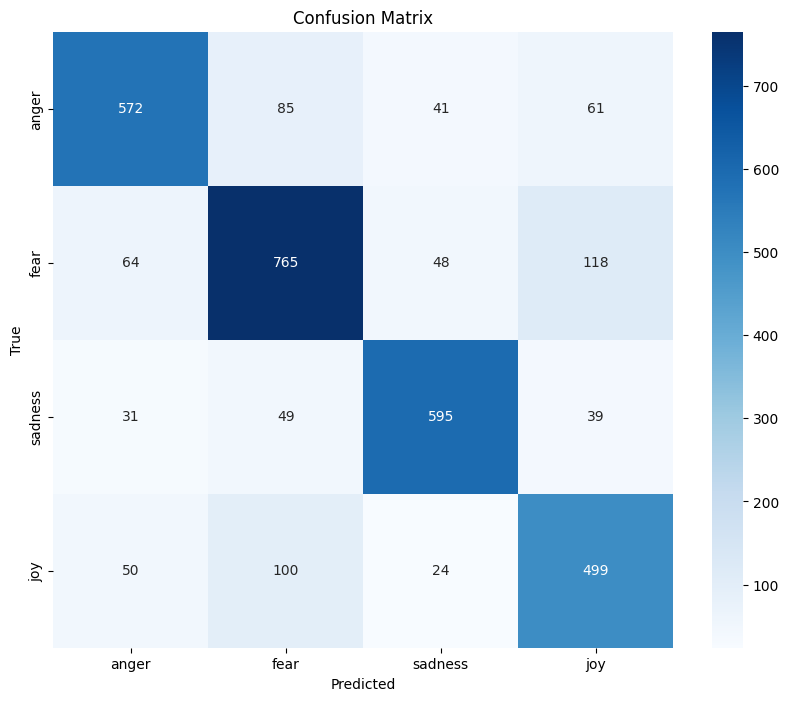

Metric Roberta_MultiTask Roberta_Classification  \
0   Classifcation Loss          0.045726               0.112553   
1      Regression Loss           0.10409                    N/A   
2          Training F1           0.98336               0.954597   
3              Test F1          0.852454               0.855755   
4        Validation F1          0.849553               0.864372   
5          Training R2          0.426939                    N/A   
6              Test R2          0.317384                    N/A   
7        Validation R2          0.212449                    N/A   
8            Max Epoch                17                      5   
9           Optimzizer             AdamW                  AdamW   
10       Learning Rate           0.00002                0.00005   
11            Patience                 3                      3   
12          Batch Size               128                     32   

   Bert_Classification BERT Regression Fear BERT Regression Anger  \
0             0.107759                  N/A                   N/A   
1                  N/A             0.054766              0.032271   
2             0.938609                  N/A                   N/A   
3              0.85518                  N/A                   N/A   
4             0.862154                  N/A                   N/A   
5                  N/A             0.881687              0.951571   
6                  N/A             0.535351               0.53406   
7                  N/A              0.33734               0.39829   
8                    3                   30                    47   
9                AdamW                AdamW                 AdamW   
10             0.00005             0.000005               0.00005   
11                   3                    5                     5   
12                  64                   64                    64   

   BERT Regression Joy BERT Regression Sadness T5 Small Classification  \
0                  N/A                     N/A                0.163887   
1             0.060322                0.068305                     N/A   
2                  N/A                     N/A                0.997361   
3                  N/A                     N/A                0.773957   
4                  N/A                     N/A                     N/A   
5             0.869842                0.748579                     N/A   
6             0.626282                 0.62225                     N/A   
7              0.63768                0.316065                     N/A   
8                   21                      16               17.699115   
9                AdamW                   AdamW                     N/A   
10             0.00005                 0.00005                     N/A   
11                   5                       5                       3   
12                  64                      64                      32   

   Distil_BERT_Classification Distil_BERT_MultiTaskModal  
0                    0.044538                   0.038899  
1                         N/A                   0.089756  
2                    0.982003                   0.980337  
3                    0.850866                   0.857259  
4                    0.864213                   0.875566  
5                         N/A                    0.60792  
6                         N/A                   0.396555  
7                         N/A                   0.293827  
8                           7                          9  
9                       AdamW                      AdamW  
10                    0.00005                    0.00002  
11                          6                          3  
12                         64                          8

In [ ]:
from transformers import T5ForConditionalGeneration, T5Tokenizer, Trainer, TrainingArguments,EarlyStoppingCallback
from sklearn.metrics import f1_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import torch

#Load the pre-trained T5 model and tokenizer
model_name = "t5-small"
model = T5ForConditionalGeneration.from_pretrained(model_name)
tokenizer = T5Tokenizer.from_pretrained(model_name)

# Function to load and preprocess the data
def load_dataset(file_path,tokenizer):
    tokenized_data = []

    with open(file_path, encoding='utf-8') as f:
        next(f)  # Skip the header line
        for line in f:
            parts = line.strip().split("\t")
            if len(parts) >= 4:
              text, emotion  =  parts[1], parts[2]
              row = {'input_text':text,'target_text':emotion}
              input_text = row['input_text']
              target_text = row['target_text']
              input_ids = tokenizer.encode("classify the emotion: " + input_text, return_tensors="pt", padding="max_length", truncation=True, max_length=64)
              target_ids = tokenizer.encode(target_text, return_tensors="pt", padding="max_length", truncation=True, max_length=64)
              tokenized_data.append({
                  "input_ids": input_ids[0],
                  "attention_mask": (input_ids[0] != 0).long(),
                  "labels": target_ids[0],
              })



    return tokenized_data


train_dataset = load_dataset('home/train.txt',tokenizer)
test_dataset = load_dataset('home/test.txt',tokenizer)
validation_dataset = load_dataset('home/dev.txt',tokenizer)

BATCH_SIZE = 32
MAX_EPOCHS = 30
LEARNING_RATE = 5e-5


# Initialize the Trainer and TrainingArguments
training_args = TrainingArguments(
    output_dir="./t5",
    per_device_train_batch_size=BATCH_SIZE,
    per_device_eval_batch_size=BATCH_SIZE,
    save_total_limit=2,
    evaluation_strategy="steps",
    eval_steps=500,
    save_steps=500,
    learning_rate=LEARNING_RATE,
    num_train_epochs=MAX_EPOCHS,
    load_best_model_at_end=True,
)
EARLY_STOPPING_PATIENCE = 3

# Add EarlyStoppingCallback
early_stopping = EarlyStoppingCallback(early_stopping_patience=EARLY_STOPPING_PATIENCE, early_stopping_threshold=0.01)
callbacks = [early_stopping]

trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=validation_dataset,
    callbacks=callbacks,
)


# Fine-tune the model
trainer.train()

# Extract training loss values
training_loss = trainer.state.log_history[-1]['train_loss']
print(f'trainer state:{trainer.state}')

EPOCHS_USED = trainer.state.epoch
print(f'EPOCHS_USED:{EPOCHS_USED}')


# Initialize lists to store predicted and true labels
predicted_train_labels = []
true_train_labels = []


# Generate predictions for the training dataset in smaller batches
for i in range(0, len(train_dataset), BATCH_SIZE):
    batch = train_dataset[i:i + BATCH_SIZE]
    predictions = trainer.predict(batch)
    predicted_train_labels.extend(predictions.predictions[0].argmax(axis=-1).tolist())
    true_train_labels.extend([item["labels"].tolist() for item in batch])


# Flatten the labels to 1D arrays
predicted_train_labels = [label for sublist in predicted_train_labels for label in sublist]
true_train_labels = [label for sublist in true_train_labels for label in sublist]

# Compute the F1 score
f1_train = f1_score(true_train_labels, predicted_train_labels,average='weighted')
print(f'F1 Score on Training Data: {f1_train}')

#Save the model
trainer.save_model()
# Save the model, configuration, and tokenizer
model.save_pretrained("t5-classification-model")
tokenizer.save_pretrained("t5-classification-model")


# For prediction
model_predict = T5ForConditionalGeneration.from_pretrained('t5-classification-model')
tokenizer_predict = T5Tokenizer.from_pretrained('t5-classification-model',repo_type='model')

# Create a list to store true labels and predicted labels
true_labels = []
predicted_labels = []

# Set up the device as cuda
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

for item in test_dataset:
    input_ids = item["input_ids"].unsqueeze(0)
    attention_mask = item["attention_mask"].unsqueeze(0)

    # Generate predictions
    with torch.no_grad():
        output = model_predict.generate(input_ids, attention_mask=attention_mask, max_length=64)

    # Decode the predicted output
    predicted_text = tokenizer_predict.decode(output[0], skip_special_tokens=True)
    true_text = tokenizer_predict.decode(item["labels"], skip_special_tokens=True)

    true_labels.append(true_text)
    predicted_labels.append(predicted_text)

# Compute F1 score
f1_test = f1_score(true_labels, predicted_labels, average='micro')
print(f'F1 Score: {f1_test}')


# Create a confusion matrix
confusion_mat = confusion_matrix(true_labels, predicted_labels)

# Plot the confusion
labels = ['anger','fear','sadness','joy']
plt.figure(figsize=(10, 8))
sns.heatmap(confusion_mat, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

results_df['T5 Small Classification'] = [training_loss,'N/A',f1_train,f1_test,'N/A','N/A','N/A','N/A',EPOCHS_USED,'N/A','N/A',EARLY_STOPPING_PATIENCE,BATCH_SIZE]
results_df


# Classification Distil BERT

In [ ]:
## Distil BERT Classification

import torch
from torch.utils.data import DataLoader, TensorDataset
from transformers import DistilBertTokenizer, DistilBertForSequenceClassification
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, mean_squared_error,r2_score,f1_score,confusion_matrix



# Load pre-trained Distill BERT tokenizer and model
tokenizer = DistilBertTokenizer.from_pretrained('distilbert-base-uncased')
pretrained_model = DistilBertForSequenceClassification.from_pretrained('distilbert-base-uncased')




# Define the Single-Task Emotion Model
class SingleTaskEmotionModel(torch.nn.Module):
    def __init__(self, bert_model, num_classes):
        super(SingleTaskEmotionModel, self).__init__()
        self.bert = bert_model
        self.classification_head = torch.nn.Linear(self.bert.config.hidden_size, num_classes)

    def forward(self, input_ids, attention_mask=None):
        # print(f"input_ids: {input_ids}")
        outputs = self.bert(input_ids=input_ids, attention_mask=attention_mask,output_hidden_states=True)

        # Extract last hidden state
        pooled_output = outputs.hidden_states[-1][:, 0, :]

        # For classification task
        classification_logits = self.classification_head(pooled_output)

        return classification_logits

# Function to load and preprocess the data
def load_data(file_path, tokenizer):
    texts = []
    labels_classification = []

    with open(file_path, encoding='utf-8') as f:
        next(f)  # Skip the header line
        for line in f:
            parts = line.strip().split("\t")
            if len(parts) >= 4:
              text, emotion, intensity =  parts[1], parts[2], float(parts[3])
              texts.append(text)
              labels_classification.append(emotion)


    inputs = tokenizer(texts, padding=True, truncation=True, return_tensors='pt')

    # Use label encoding for emotion labels
    emotion_label_encoder = LabelEncoder()
    labels_classification_encoded = emotion_label_encoder.fit_transform(labels_classification)

    labels_classification = torch.tensor(labels_classification_encoded)


    return TensorDataset(inputs.input_ids, inputs.attention_mask, labels_classification)

# # Load the data
train_dataset = load_data('home/train.txt', tokenizer)
valid_dataset = load_data('home/dev.txt', tokenizer)
test_dataset = load_data('home/test.txt', tokenizer)

# Create DataLoader objects
BATCH_SIZE = 64
train_loader = DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True)
valid_loader = DataLoader(valid_dataset, batch_size=BATCH_SIZE)
test_loader = DataLoader(test_dataset, batch_size=BATCH_SIZE)

# Set up the device
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Initialize the multi-task model
NUM_CLASSES = 4  # Number of emotion categories (anger, fear, joy, sadness)
single_task_model = SingleTaskEmotionModel(pretrained_model, num_classes=NUM_CLASSES)
single_task_model.to(device)

# Hyperparameters
LEARNING_RATE = 5e-5
OPTIMIZER = 'AdamW'
# Set up the optimizer and loss functions
optimizer = AdamW(single_task_model.parameters(), lr=LEARNING_RATE,weight_decay=0.95)
classification_criterion = torch.nn.CrossEntropyLoss()

# Train the single-task model
NUM_EPOCHS = 30
# Early stopping parameters
early_stopping_patience = 6  # Number of epochs to wait for improvement
best_combined_loss = float('inf')  # Initialize the best validation loss
no_improvement_count = 0  # Initialize the count for the number of epochs with no improvement

for epoch in range(NUM_EPOCHS):
    single_task_model.train()
    total_classification_loss = 0.0
    total_regression_loss = 0.0
    all_predicted_train_labels = []
    all_true_train_labels = []

    for batch in train_loader:
        batch_input_ids, batch_attention_mask, batch_labels_classification = batch
        batch_input_ids, batch_attention_mask, batch_labels_classification = \
            batch_input_ids.to(device), batch_attention_mask.to(device), batch_labels_classification.to(device)

        optimizer.zero_grad()
        classification_logits = single_task_model(batch_input_ids, attention_mask=batch_attention_mask)

        # Compute losses for classification and regression tasks
        classification_loss = classification_criterion(classification_logits, batch_labels_classification)


        classification_loss.backward()
        optimizer.step()

        total_classification_loss += classification_loss.item()

        ## Classification Accuracy variables
        predicted_labels = classification_logits.argmax(dim=1)
        all_predicted_train_labels.extend(predicted_labels.cpu().numpy())
        all_true_train_labels.extend(batch_labels_classification.cpu().numpy())

     ## Validation

    for batch in valid_loader:
        single_task_model.eval()
        batch_input_ids, batch_attention_mask, batch_labels_classification = batch
        batch_input_ids, batch_attention_mask, batch_labels_classification = \
            batch_input_ids.to(device), batch_attention_mask.to(device), batch_labels_classification.to(device)

        optimizer.zero_grad()
        classification_logits = single_task_model(batch_input_ids, attention_mask=batch_attention_mask)

        # Compute losses for classification and regression tasks
        classification_val_loss = classification_criterion(classification_logits, batch_labels_classification)


        total_val_classification_loss += classification_loss.item()


    average_combined_val_loss = classification_val_loss/len(valid_loader)
    print(f'average_combined_val_loss:{average_combined_val_loss}')
    # Check for early stopping
    if average_combined_val_loss < best_combined_loss:
        best_combined_loss = average_combined_val_loss
        no_improvement_count = 0
    else:
        no_improvement_count += 1

    # If there's no improvement for the specified patience, stop training
    if no_improvement_count >= early_stopping_patience:
        print(f'Early stopping triggered after {epoch + 1} epochs without improvement.')
        break


    ## Calculate Classification Accuracy
    classification_accuracy = f1_score(all_true_train_labels, all_predicted_train_labels,average='weighted')

    print(f'Epoch {epoch + 1}/{NUM_EPOCHS}, '
          f'Classification Loss: {total_classification_loss / len(train_loader):.3f}')
    print(f'Clasification Training F1 Score: {classification_accuracy}')

# Function for evaluation
def evaluate_model(model, data_loader, classification_criterion):
    model.eval()
    total_classification_loss = 0.0
    all_predicted_labels = []
    all_true_labels = []


    with torch.no_grad():
        for batch in data_loader:
            batch_input_ids, batch_attention_mask, batch_labels_classification = batch
            batch_input_ids, batch_attention_mask, batch_labels_classification = \
                batch_input_ids.to(device), batch_attention_mask.to(device), batch_labels_classification.to(device)


            classification_logits = model(batch_input_ids, attention_mask=batch_attention_mask)


            ## Classification Accuracy
            predicted_labels = classification_logits.argmax(dim=1)

            all_predicted_labels.extend(predicted_labels.cpu().numpy())
            all_true_labels.extend(batch_labels_classification.cpu().numpy())


            classification_loss = classification_criterion(classification_logits, batch_labels_classification)
            total_classification_loss += classification_loss.item()

    #Classification Accuracy
    classification_accuracy = f1_score(all_true_labels, all_predicted_labels,average='weighted')

    avg_classification_loss = total_classification_loss / len(data_loader)

    return avg_classification_loss, classification_accuracy

# # Evaluate the model on the validation set
valid_classification_loss, valid_classification_accuracy = evaluate_model(single_task_model, valid_loader,
                                                                   classification_criterion)
print(f'Validation Classification Loss: {valid_classification_loss:.3f}')
print(f'Validation Classification Accuracy: {valid_classification_accuracy:.3f}')



# Evaluate the model on the test set
test_classification_loss,test_classification_accuracy = evaluate_model(single_task_model, test_loader,
                                                                 classification_criterion)



print(f'Test Classification Loss: {test_classification_loss:.3f}')
print(f'Test Classification Accuracy: {test_classification_accuracy:.3f}')



results_df['Distil_BERT_Classification'] = [total_classification_loss / len(train_loader),'N/A',classification_accuracy,test_classification_accuracy,valid_classification_accuracy,'N/A','N/A','N/A',epoch,OPTIMIZER,LEARNING_RATE,early_stopping_patience,BATCH_SIZE]
results_df



Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'pre_classifier.bias', 'classifier.weight', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/usr/local/lib/python3.10/dist-packages/transformers/optimization.py:429: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


average_combined_val_loss:0.1277364045381546
Epoch 1/30, Classification Loss: 0.958
Clasification Training F1 Score: 0.5870343155222049
average_combined_val_loss:0.1016903668642044
Epoch 2/30, Classification Loss: 0.348
Clasification Training F1 Score: 0.876295670621985
average_combined_val_loss:0.14090126752853394
Epoch 3/30, Classification Loss: 0.176
Clasification Training F1 Score: 0.9377540705649328
average_combined_val_loss:0.17433969676494598
Epoch 4/30, Classification Loss: 0.099
Clasification Training F1 Score: 0.9687286684583578
average_combined_val_loss:0.18171122670173645
Epoch 5/30, Classification Loss: 0.065
Clasification Training F1 Score: 0.975641528634814
average_combined_val_loss:0.1944483369588852
Epoch 6/30, Classification Loss: 0.048
Clasification Training F1 Score: 0.9817250100274276
average_combined_val_loss:0.22685329616069794
Epoch 7/30, Classification Loss: 0.045
Clasification Training F1 Score: 0.9820025980636449
average_combined_val_loss:0.1355666220188141
E

Metric Roberta_MultiTask Roberta_Classification  \
0   Classifcation Loss          0.045726               0.112553   
1      Regression Loss           0.10409                    N/A   
2          Training F1           0.98336               0.954597   
3              Test F1          0.852454               0.855755   
4        Validation F1          0.849553               0.864372   
5          Training R2          0.426939                    N/A   
6              Test R2          0.317384                    N/A   
7        Validation R2          0.212449                    N/A   
8            Max Epoch                17                      5   
9           Optimzizer             AdamW                  AdamW   
10       Learning Rate           0.00002                0.00005   
11            Patience                 3                      3   
12          Batch Size               128                     32   

   Bert_Classification BERT Regression Fear BERT Regression Anger  \
0             0.107759                  N/A                   N/A   
1                  N/A             0.054766              0.032271   
2             0.938609                  N/A                   N/A   
3              0.85518                  N/A                   N/A   
4             0.862154                  N/A                   N/A   
5                  N/A             0.881687              0.951571   
6                  N/A             0.535351               0.53406   
7                  N/A              0.33734               0.39829   
8                    3                   30                    47   
9                AdamW                AdamW                 AdamW   
10             0.00005             0.000005               0.00005   
11                   3                    5                     5   
12                  64                   64                    64   

   BERT Regression Joy BERT Regression Sadness T5 Small Classification  \
0                  N/A                     N/A                0.163887   
1             0.060322                0.068305                     N/A   
2                  N/A                     N/A                0.997361   
3                  N/A                     N/A                0.773957   
4                  N/A                     N/A                     N/A   
5             0.869842                0.748579                     N/A   
6             0.626282                 0.62225                     N/A   
7              0.63768                0.316065                     N/A   
8                   21                      16               17.699115   
9                AdamW                   AdamW                     N/A   
10             0.00005                 0.00005                     N/A   
11                   5                       5                       3   
12                  64                      64                      32   

   Distil_BERT_Classification  
0                    0.044538  
1                         N/A  
2                    0.982003  
3                    0.850866  
4                    0.864213  
5                         N/A  
6                         N/A  
7                         N/A  
8                           7  
9                       AdamW  
10                    0.00005  
11                          6  
12                         64

# Multitask Distil BERT

Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'pre_classifier.bias', 'classifier.weight', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


average_combined_val_loss:0.3699532598257065
Epoch 1/30, Classification Loss: 0.836, Regression Loss: 0.169
Clasification Training F1 Score: 0.6376997903598883
Regression Training R2 Score -0.2431629110780955
average_combined_val_loss:1.5323376655578613
Epoch 2/30, Classification Loss: 0.327, Regression Loss: 0.146
Clasification Training F1 Score: 0.8816195565467309
Regression Training R2 Score 0.06604913000813684
average_combined_val_loss:0.2854428179562092
Epoch 3/30, Classification Loss: 0.184, Regression Loss: 0.134
Clasification Training F1 Score: 0.9330673608145374
Regression Training R2 Score 0.20978422551649212
average_combined_val_loss:0.11110964976251125
Epoch 4/30, Classification Loss: 0.104, Regression Loss: 0.127
Clasification Training F1 Score: 0.9656767589413701
Regression Training R2 Score 0.2882259427634426
average_combined_val_loss:0.2661289188545197
Epoch 5/30, Classification Loss: 0.073, Regression Loss: 0.118
Clasification Training F1 Score: 0.9756300455897732
Regr

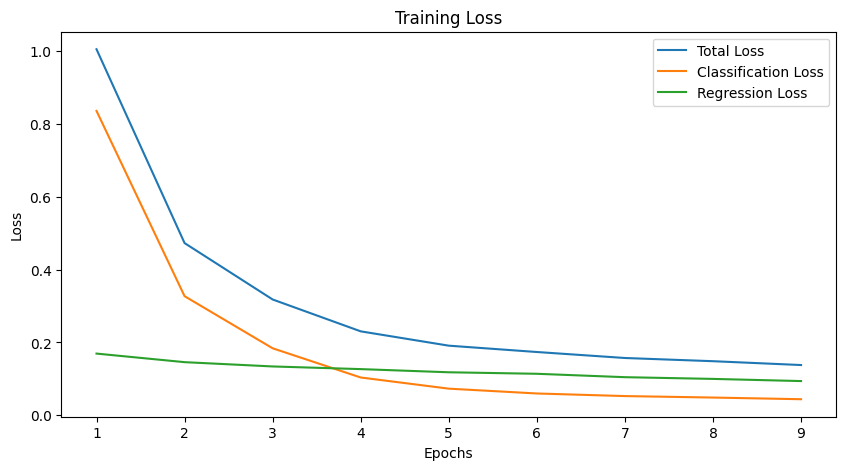

Pearson correlation in evaluate : 0.6060944120525235
P-value Training: 4.4539153727299165e-36


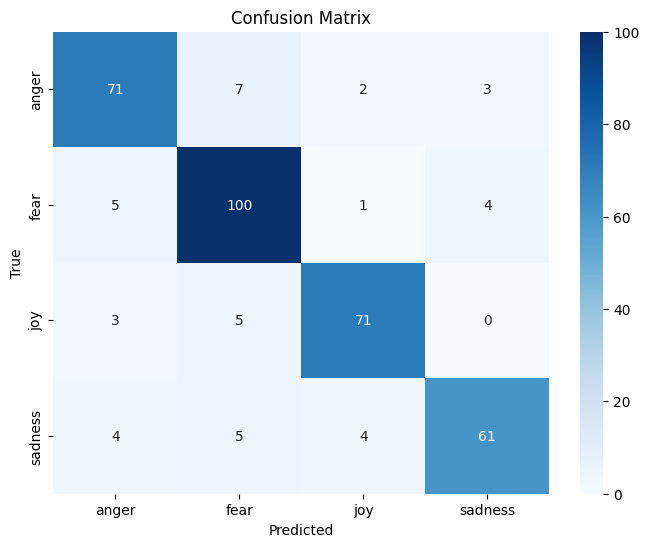

Validation Classification Loss: 0.587, Validation Regression Loss: 0.121
Validation Classification Accuracy: 0.876
Validation Regression Accuracy: 0.294
Validation Pearson Correlation: 0.606
Pearson correlation in evaluate : 0.6615637078804985
P-value Training: 0.0


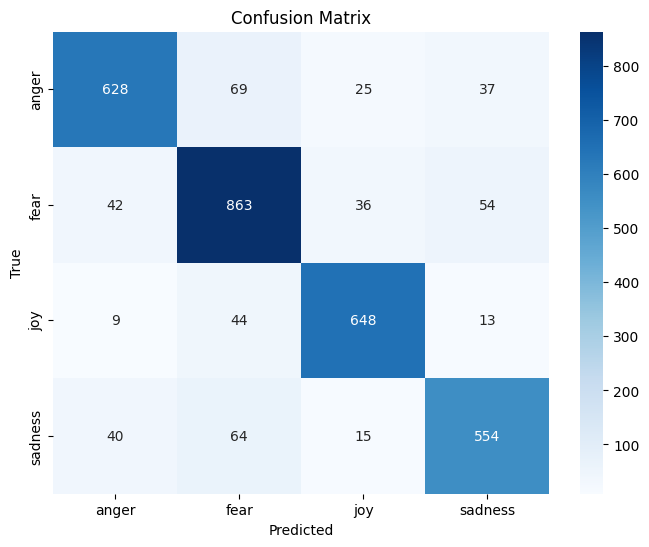

Test Classification Loss: 0.561, Test Regression Loss: 0.120
Test Regression Accuracy: 0.397
Test Classification Accuracy: 0.857
Test Pearson Correlation: 0.662


Metric Roberta_MultiTask Roberta_Classification  \
0   Classifcation Loss          0.045726               0.112553   
1      Regression Loss           0.10409                    N/A   
2          Training F1           0.98336               0.954597   
3              Test F1          0.852454               0.855755   
4        Validation F1          0.849553               0.864372   
5          Training R2          0.426939                    N/A   
6              Test R2          0.317384                    N/A   
7        Validation R2          0.212449                    N/A   
8            Max Epoch                17                      5   
9           Optimzizer             AdamW                  AdamW   
10       Learning Rate           0.00002                0.00005   
11            Patience                 3                      3   
12          Batch Size               128                     32   

   Bert_Classification BERT Regression Fear BERT Regression Anger  \
0             0.107759                  N/A                   N/A   
1                  N/A             0.054766              0.032271   
2             0.938609                  N/A                   N/A   
3              0.85518                  N/A                   N/A   
4             0.862154                  N/A                   N/A   
5                  N/A             0.881687              0.951571   
6                  N/A             0.535351               0.53406   
7                  N/A              0.33734               0.39829   
8                    3                   30                    47   
9                AdamW                AdamW                 AdamW   
10             0.00005             0.000005               0.00005   
11                   3                    5                     5   
12                  64                   64                    64   

   BERT Regression Joy BERT Regression Sadness T5 Small Classification  \
0                  N/A                     N/A                0.163887   
1             0.060322                0.068305                     N/A   
2                  N/A                     N/A                0.997361   
3                  N/A                     N/A                0.773957   
4                  N/A                     N/A                     N/A   
5             0.869842                0.748579                     N/A   
6             0.626282                 0.62225                     N/A   
7              0.63768                0.316065                     N/A   
8                   21                      16               17.699115   
9                AdamW                   AdamW                     N/A   
10             0.00005                 0.00005                     N/A   
11                   5                       5                       3   
12                  64                      64                      32   

   Distil_BERT_Classification Distil_BERT_MultiTaskModal  
0                    0.044538                   0.038899  
1                         N/A                   0.089756  
2                    0.982003                   0.980337  
3                    0.850866                   0.857259  
4                    0.864213                   0.875566  
5                         N/A                    0.60792  
6                         N/A                   0.396555  
7                         N/A                   0.293827  
8                           7                          9  
9                       AdamW                      AdamW  
10                    0.00005                    0.00002  
11                          6                          3  
12                         64                          8

In [ ]:
## Distil BERT multitask

import torch
from torch.utils.data import DataLoader, TensorDataset
from transformers import DistilBertTokenizer, DistilBertForSequenceClassification
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, mean_squared_error,r2_score,f1_score,confusion_matrix
from tidyX import TextPreprocessor as tp



# Load pre-trained DistillBERT tokenizer and model
tokenizer = DistilBertTokenizer.from_pretrained('distilbert-base-uncased')
multi_task_model = DistilBertForSequenceClassification.from_pretrained('distilbert-base-uncased')



# Define the Multi-Task Emotion Model
class MultiTaskEmotionModel(torch.nn.Module):
    def __init__(self, bert_model, num_classes):
        super(MultiTaskEmotionModel, self).__init__()
        self.bert = bert_model
        self.classification_head = torch.nn.Linear(self.bert.config.hidden_size, num_classes)
        self.regression_head = torch.nn.Linear(self.bert.config.hidden_size, 1)

    def forward(self, input_ids, attention_mask=None):
        # print(f"input_ids: {input_ids}")
        outputs = self.bert(input_ids=input_ids, attention_mask=attention_mask,output_hidden_states=True)

        # Extract last hidden state
        pooled_output = outputs.hidden_states[-1][:, 0, :]

        # For classification task
        classification_logits = self.classification_head(pooled_output)

        # For regression task
        regression_output = self.regression_head(pooled_output)


        return classification_logits, regression_output

# Function to load and preprocess the data
def load_data(file_path, tokenizer):
    texts = []
    labels_classification = []
    labels_regression = []

    with open(file_path, encoding='utf-8') as f:
        next(f)  # Skip the header line
        for line in f:
            parts = line.strip().split("\t")
            if len(parts) >= 4:
              text, emotion, intensity =  parts[1], parts[2], float(parts[3])
              # if intensity > 0.05  and intensity < 0.95:
              #   preprocessed_text = tp.preprocess(text,delete_emojis=False)
              texts.append(text)
              labels_classification.append(emotion)
              labels_regression.append(intensity)



    inputs = tokenizer(texts, padding=True, truncation=True, return_tensors='pt')

    # Use label encoding for emotion labels
    emotion_label_encoder = LabelEncoder()
    labels_classification_encoded = emotion_label_encoder.fit_transform(labels_classification)

    labels_classification = torch.tensor(labels_classification_encoded)

    labels_regression = torch.tensor(labels_regression,dtype=torch.float)


    return TensorDataset(inputs.input_ids, inputs.attention_mask, labels_classification, labels_regression)

# # Load the data
train_dataset = load_data('home/train.txt', tokenizer)
valid_dataset = load_data('home/dev.txt', tokenizer)
test_dataset = load_data('home/test.txt', tokenizer)

# Create DataLoader objects
BATCH_SIZE = 8
train_loader = DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True)
valid_loader = DataLoader(valid_dataset, batch_size=BATCH_SIZE)
test_loader = DataLoader(test_dataset, batch_size=BATCH_SIZE)

# Set up the device
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Initialize the multi-task model
NUM_CLASSES = 4  # Number of emotion categories (anger, fear, joy, sadness)
multi_task_model = MultiTaskEmotionModel(multi_task_model, num_classes=NUM_CLASSES)
multi_task_model.to(device)

LEARNING_RATE = 2e-5
OPTIMIZER = 'AdamW'
# Set up the optimizer and loss functions
optimizer = torch.optim.AdamW(multi_task_model.parameters(), lr=LEARNING_RATE)
classification_criterion = torch.nn.CrossEntropyLoss()
regression_criterion = torch.nn.L1Loss()

## Store loss at each epoch
list_total_train_loss = []
list_train_regression_loss = []
list_train_classification_loss = []


# Train the multi-task model
NUM_EPOCHS = 30
# Early stopping parameters
early_stopping_patience = 3  # Number of epochs to wait for improvement
best_combined_loss = float('inf')  # Initialize the best validation loss
no_improvement_count = 0  # Initialize the count for the number of epochs with no improvement

for epoch in range(NUM_EPOCHS):
    multi_task_model.train()
    total_classification_loss = 0.0
    total_regression_loss = 0.0
    total_val_classification_loss = 0.0
    total_val_regression_loss = 0.0
    combined_val_total_loss =0.0
    #train
    all_predicted_train_labels = []
    all_true_train_labels = []
    all_predicted_train_outputs = []
    all_true_train_outputs = []



    for batch in train_loader:
        batch_input_ids, batch_attention_mask, batch_labels_classification, batch_labels_regression = batch
        batch_input_ids, batch_attention_mask, batch_labels_classification, batch_labels_regression = \
            batch_input_ids.to(device), batch_attention_mask.to(device), batch_labels_classification.to(device), batch_labels_regression.to(device)

        optimizer.zero_grad()
        classification_logits, regression_output = multi_task_model(batch_input_ids, attention_mask=batch_attention_mask)

        # Compute losses for classification and regression tasks
        classification_loss = classification_criterion(classification_logits, batch_labels_classification)
        regression_loss = regression_criterion(regression_output.squeeze(), batch_labels_regression)


        # Total loss is a weighted combination of classification and regression losses
        total_loss = classification_loss + regression_loss

        total_loss.backward()
        optimizer.step()

        total_classification_loss += classification_loss.item()
        total_regression_loss += regression_loss.item()

        ## Classification Accuracy variables
        predicted_labels = classification_logits.argmax(dim=1)
        all_predicted_train_labels.extend(predicted_labels.cpu().numpy())
        all_true_train_labels.extend(batch_labels_classification.cpu().numpy())


        # Regression Training Accuracy outputs

        predicted_outputs = regression_output.flatten()
        true_outputs = batch_labels_regression

        all_predicted_train_outputs.extend(predicted_outputs)
        all_true_train_outputs.extend(true_outputs)

    ## Validation

    for batch in valid_loader:
        multi_task_model.eval()
        batch_input_ids, batch_attention_mask, batch_labels_classification, batch_labels_regression = batch
        batch_input_ids, batch_attention_mask, batch_labels_classification, batch_labels_regression = \
            batch_input_ids.to(device), batch_attention_mask.to(device), batch_labels_classification.to(device), batch_labels_regression.to(device)

        optimizer.zero_grad()
        classification_logits, regression_output = multi_task_model(batch_input_ids, attention_mask=batch_attention_mask)

        # Compute losses for classification and regression tasks
        classification_val_loss = classification_criterion(classification_logits, batch_labels_classification)


        regression_val_loss = regression_criterion(regression_output.squeeze(), batch_labels_regression)


        # Total loss is a combination of classification and regression losses
        combined_val_loss = classification_val_loss + regression_val_loss

        total_val_classification_loss += classification_loss.item()
        total_val_regression_loss += regression_loss.item()
        combined_val_total_loss = total_val_classification_loss + total_val_regression_loss





    average_combined_val_loss = combined_val_total_loss/len(valid_loader)
    print(f'average_combined_val_loss:{average_combined_val_loss}')
    # Check for early stopping
    if average_combined_val_loss < best_combined_loss:
        best_combined_loss = average_combined_val_loss
        no_improvement_count = 0
    else:
        no_improvement_count += 1

    # If there's no improvement for the specified patience, stop training
    if no_improvement_count >= early_stopping_patience:
        print(f'Early stopping triggered after {epoch + 1} epochs without improvement.')
        break



    ## Calculate Classification Accuracy
    classification_accuracy = f1_score(all_true_train_labels, all_predicted_train_labels,average='weighted')

    ## Calculate Regression Accuracy using R2
    regression_train_accuracy = r2_score([item.detach().cpu().numpy() for item in all_true_train_outputs], [item.detach().cpu().numpy() for item in all_predicted_train_outputs])

    print(f'Epoch {epoch + 1}/{NUM_EPOCHS}, '
          f'Classification Loss: {total_classification_loss / len(train_loader):.3f}, '
          f'Regression Loss: {total_regression_loss / len(train_loader):.3f}')

    print(f'Clasification Training F1 Score: {classification_accuracy}')
    print(f'Regression Training R2 Score {regression_train_accuracy}')

    avg_class_loss = total_classification_loss / len(train_loader)
    avg_reg_loss = total_regression_loss / len(train_loader)

    ##Total Regression Loss are added for each epoch
    list_train_regression_loss.append(avg_reg_loss)

    ##Total Classification Loss is added for each epoch
    list_train_classification_loss.append(avg_class_loss)

    ## Combined Training loss
    list_total_train_loss.append(avg_reg_loss + avg_class_loss)


# Plotting Training loss with epochs
plt.figure(figsize=(10, 5))
plt.plot(range(1, epoch + 1), list_total_train_loss, label='Total Loss')
plt.plot(range(1, epoch + 1), list_train_classification_loss, label='Classification Loss')
plt.plot(range(1, epoch + 1), list_train_regression_loss, label='Regression Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training Loss')
plt.legend()
plt.show()

# Function for evaluation
def evaluate_model(model, data_loader, classification_criterion, regression_criterion):
    model.eval()
    total_classification_loss = 0.0
    total_regression_loss = 0.0
    all_predicted_labels = []
    all_true_labels = []
    all_predicted_outputs = []
    all_true_outputs = []

    with torch.no_grad():
        for batch in data_loader:
            batch_input_ids, batch_attention_mask, batch_labels_classification, batch_labels_regression = batch
            batch_input_ids, batch_attention_mask, batch_labels_classification, batch_labels_regression = \
                batch_input_ids.to(device), batch_attention_mask.to(device), batch_labels_classification.to(device), batch_labels_regression.to(device)


            classification_logits, regression_output = model(batch_input_ids, attention_mask=batch_attention_mask)


            ## Classification Accuracy
            predicted_labels = classification_logits.argmax(dim=1)

            all_predicted_labels.extend(predicted_labels.cpu().numpy())
            all_true_labels.extend(batch_labels_classification.cpu().numpy())

            ## Regression Accuracy Variables
            predicted_outputs = regression_output.flatten().cpu()


            true_outputs = batch_labels_regression.cpu()

            all_predicted_outputs.extend(predicted_outputs)
            all_true_outputs.extend(true_outputs)



            classification_loss = classification_criterion(classification_logits, batch_labels_classification)
            regression_loss = regression_criterion(regression_output.squeeze(),batch_labels_regression)



            total_classification_loss += classification_loss.item()
            total_regression_loss += regression_loss.item()

    #Classification Accuracy
    classification_accuracy = f1_score(all_true_labels, all_predicted_labels, average='weighted')


    # Calculate the R-squared (R2) score
    regression_accuracy = r2_score(all_true_outputs, all_predicted_outputs)


    ##Pearson correlation
    correlation_coefficient, p_value = pearsonr(all_predicted_outputs, all_true_outputs)
    print(f"Pearson correlation in evaluate : {correlation_coefficient}")
    print(f"P-value Training: {p_value}")

    avg_classification_loss = total_classification_loss / len(data_loader)
    avg_regression_loss = total_regression_loss / len(data_loader)

    ## Visualizations
    # Create confusion matrix
    conf_matrix = confusion_matrix(all_true_labels, all_predicted_labels)

    # plot confusion matrix using seaborn heatmap
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['anger', 'fear', 'joy', 'sadness'],
                yticklabels=['anger', 'fear', 'joy', 'sadness'])
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title('Confusion Matrix')
    plt.show()


    return avg_classification_loss, avg_regression_loss, classification_accuracy,regression_accuracy,correlation_coefficient

# # Evaluate the model on the validation set
valid_classification_loss, valid_regression_loss, valid_classification_accuracy, valid_regression_accuracy,valid_correlation_coefficient = evaluate_model(multi_task_model, valid_loader,
                                                                   classification_criterion, regression_criterion)
print(f'Validation Classification Loss: {valid_classification_loss:.3f}, '
      f'Validation Regression Loss: {valid_regression_loss:.3f}')
print(f'Validation Classification Accuracy: {valid_classification_accuracy:.3f}')
print(f'Validation Regression Accuracy: {valid_regression_accuracy:.3f}')
print(f'Validation Pearson Correlation: {valid_correlation_coefficient:.3f}')




# Evaluate the model on the test set
test_classification_loss, test_regression_loss,test_classification_accuracy,test_regression_accuracy,test_correlation_coefficient = evaluate_model(multi_task_model, test_loader,
                                                                 classification_criterion, regression_criterion)



print(f'Test Classification Loss: {test_classification_loss:.3f}, '
      f'Test Regression Loss: {test_regression_loss:.3f}')
print(f'Test Regression Accuracy: {test_regression_accuracy:.3f}')
print(f'Test Classification Accuracy: {test_classification_accuracy:.3f}')
print(f'Test Pearson Correlation: {test_correlation_coefficient:.3f}')



results_df['Distil_BERT_MultiTaskModal'] = [total_classification_loss / len(train_loader),total_regression_loss / len(train_loader),classification_accuracy,test_classification_accuracy,valid_classification_accuracy,regression_train_accuracy,test_regression_accuracy,valid_regression_accuracy,epoch,OPTIMIZER,LEARNING_RATE,early_stopping_patience,BATCH_SIZE]
results_df

